In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Walmart DataSet.csv')

# DATA PREPARATION AND ANALYSIS

*We will do Exploratory Data Analysis*

In [3]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.duplicated().sum()

0

*Let's check any outliers on sales values*

In [5]:
data[data['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [6]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df=data.iloc[:,:]

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
tmp=df.iloc[:,[1]]
tmp['Date']=pd.to_datetime(tmp['Date'],format='%d-%m-%Y')
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


<ipython-input-9-d213a4a9a3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Date']=pd.to_datetime(tmp['Date'],format='%d-%m-%Y')


In [10]:
#dt1['Date'] = pd.to_datetime(dt1['Date'],format='%d-%m-%Y')
#date_col=pd.DatetimeIndex(dt1['Date'])
#temp['Year']=date_col.year
#temp['Month']=date_col.month
#temp['Day']=date_col.day



date_column=pd.DatetimeIndex(tmp['Date'])
df['Day']=date_column.day
df['Month']=date_column.month
df['Year']=date_column.year



In [11]:
df=df.sort_values(by=['Year','Month','Day'])

In [ ]:
df.head(500)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324,5,2,2010
286,3,05-02-2010,461622.22,0,45.71,2.572,214.424881,7.368,5,2,2010
429,4,05-02-2010,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
572,5,05-02-2010,317173.10,0,39.70,2.572,211.653972,6.566,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...
11,1,23-04-2010,1391256.12,0,64.84,2.795,210.439123,7.808,23,4,2010
154,2,23-04-2010,1821990.93,0,65.11,2.795,210.100065,8.200,23,4,2010
297,3,23-04-2010,339976.65,0,67.87,2.795,213.722185,7.343,23,4,2010
440,4,23-04-2010,1802677.90,0,56.87,2.805,126.471333,7.896,23,4,2010


In [12]:
walmart_pred=df.loc[:,['Date','Weekly_Sales']]

In [13]:
 df.tail(100)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
5145,36,12-10-2012,300236.85,0,71.28,3.576,222.051079,6.228,12,10,2012
5288,37,12-10-2012,521810.75,0,71.28,3.601,222.051079,6.228,12,10,2012
5431,38,12-10-2012,437320.66,0,71.74,4.468,131.108333,10.199,12,10,2012
5574,39,12-10-2012,1494417.07,0,69.88,3.601,222.051079,6.228,12,10,2012
5717,40,12-10-2012,982523.26,0,47.35,4.029,138.911700,4.145,12,10,2012
...,...,...,...,...,...,...,...,...,...,...,...
5862,41,26-10-2012,1316542.59,0,41.80,3.686,199.219532,6.195,26,10,2012
6005,42,26-10-2012,514756.08,0,70.50,4.301,131.193097,6.943,26,10,2012
6148,43,26-10-2012,587603.55,0,69.17,3.506,214.741539,8.839,26,10,2012
6291,44,26-10-2012,361067.07,0,46.97,3.755,131.193097,5.217,26,10,2012


In [14]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

                     Store          Date  Weekly_Sales  Holiday_Flag  \
Store         1.000000e+00  2.274047e-15     -0.335332  1.323199e-16   
Date          2.274047e-15  1.000000e+00      0.006949 -1.328524e-02   
Weekly_Sales -3.353320e-01  6.949360e-03      1.000000  3.689097e-02   
Holiday_Flag  1.323199e-16 -1.328524e-02      0.036891  1.000000e+00   
Temperature  -2.265908e-02  1.453566e-01     -0.063810 -1.550913e-01   
Fuel_Price    6.002295e-02  7.714439e-01      0.009464 -7.834652e-02   
CPI          -2.094919e-01  7.715746e-02     -0.072634 -2.162091e-03   
Unemployment  2.235313e-01 -2.482029e-01     -0.106176  1.096028e-02   
Day           1.021602e-16  4.193021e-02     -0.017409  4.452608e-02   
Month         3.310988e-16  1.456512e-01      0.076143  1.229958e-01   
Year         -7.775798e-15  9.416680e-01     -0.018378 -5.678257e-02   

              Temperature  Fuel_Price       CPI  Unemployment           Day  \
Store           -0.022659    0.060023 -0.209492      0.2

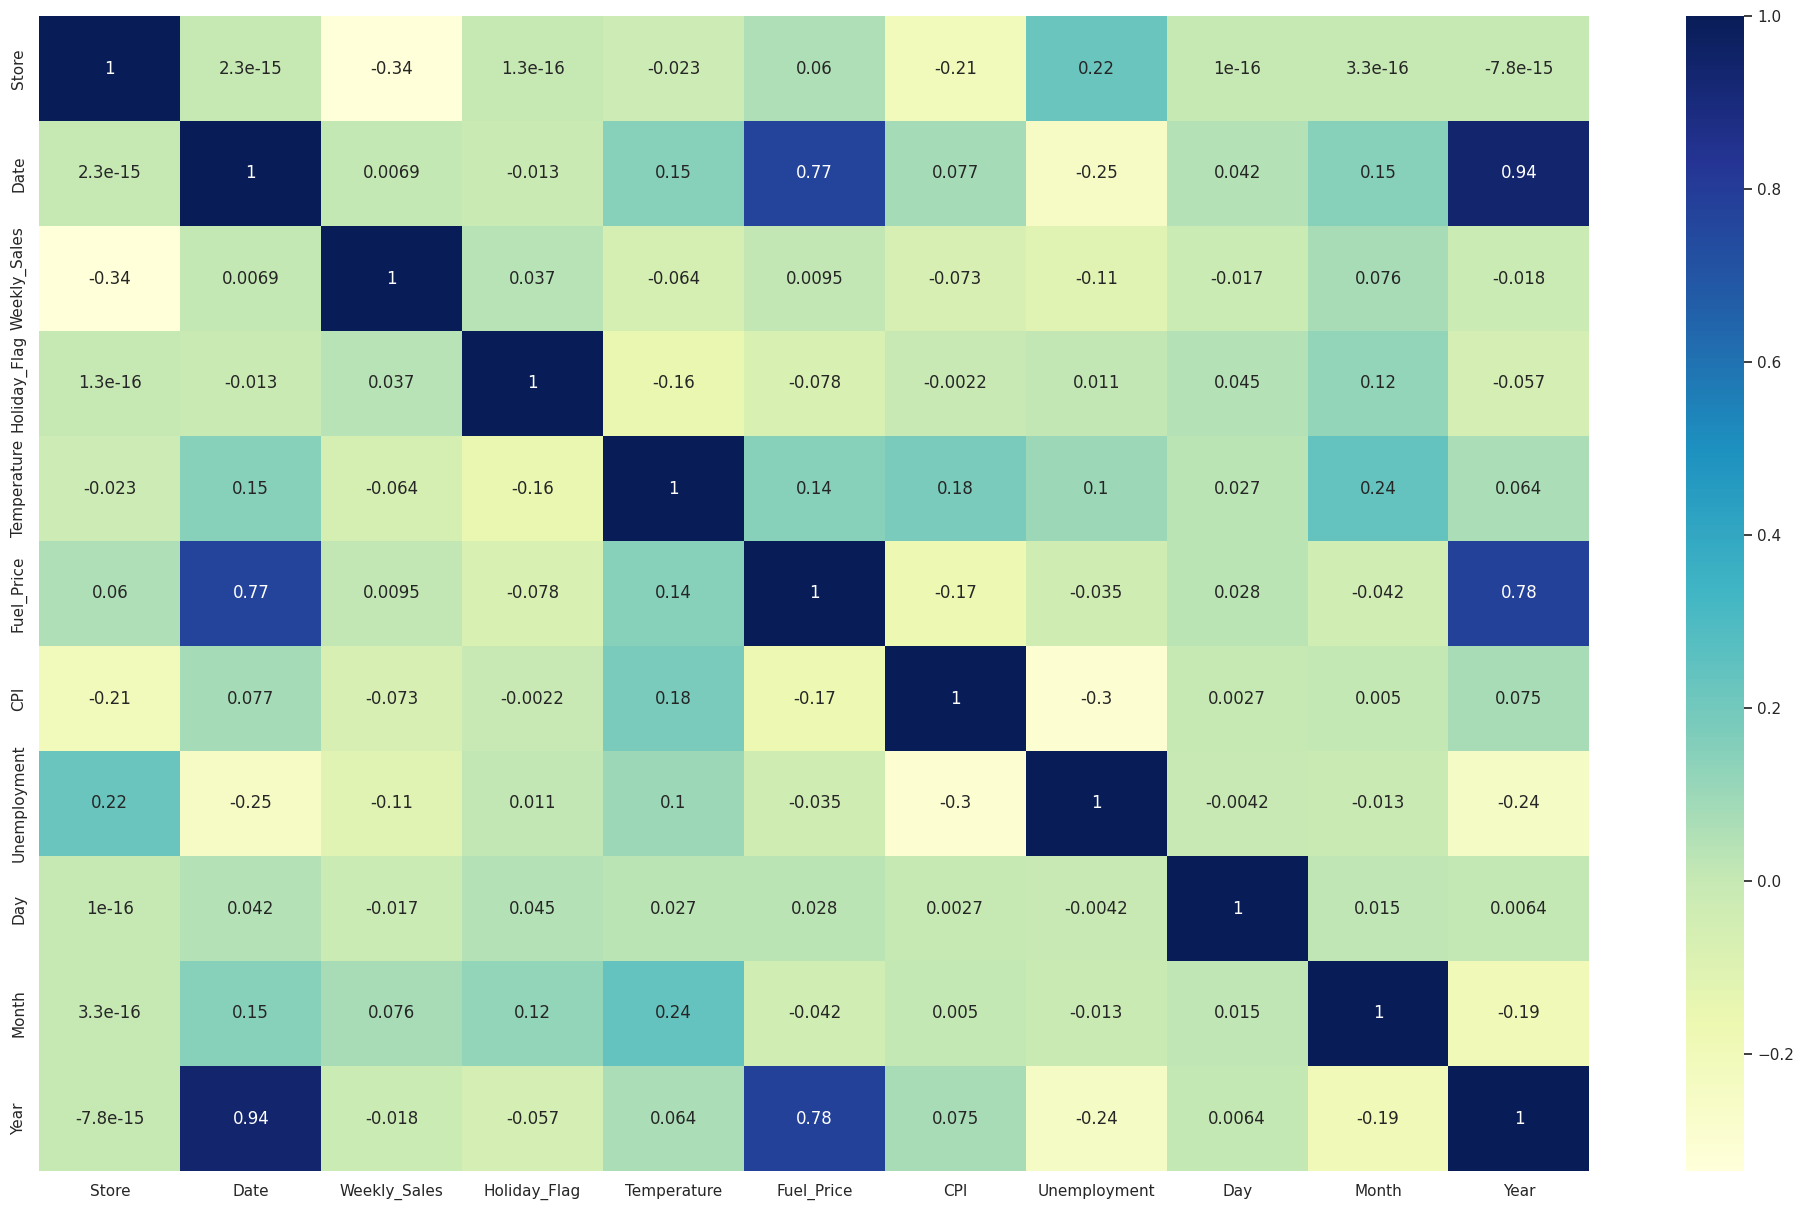

In [ ]:


# import file with data


# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
plt.figure(figsize=(25,15))
print(df.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})

# displaying heatmap
plt.show()


# Year Vs Fuel_Price

<ipython-input-17-0aed8665583a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Year", y="Fuel_Price", data=tips, palette=sns.color_palette("deep", 10))
<ipython-input-17-0aed8665583a>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(x="Year", y="Fuel_Price", data=tips, palette=sns.color_palette("deep", 10))


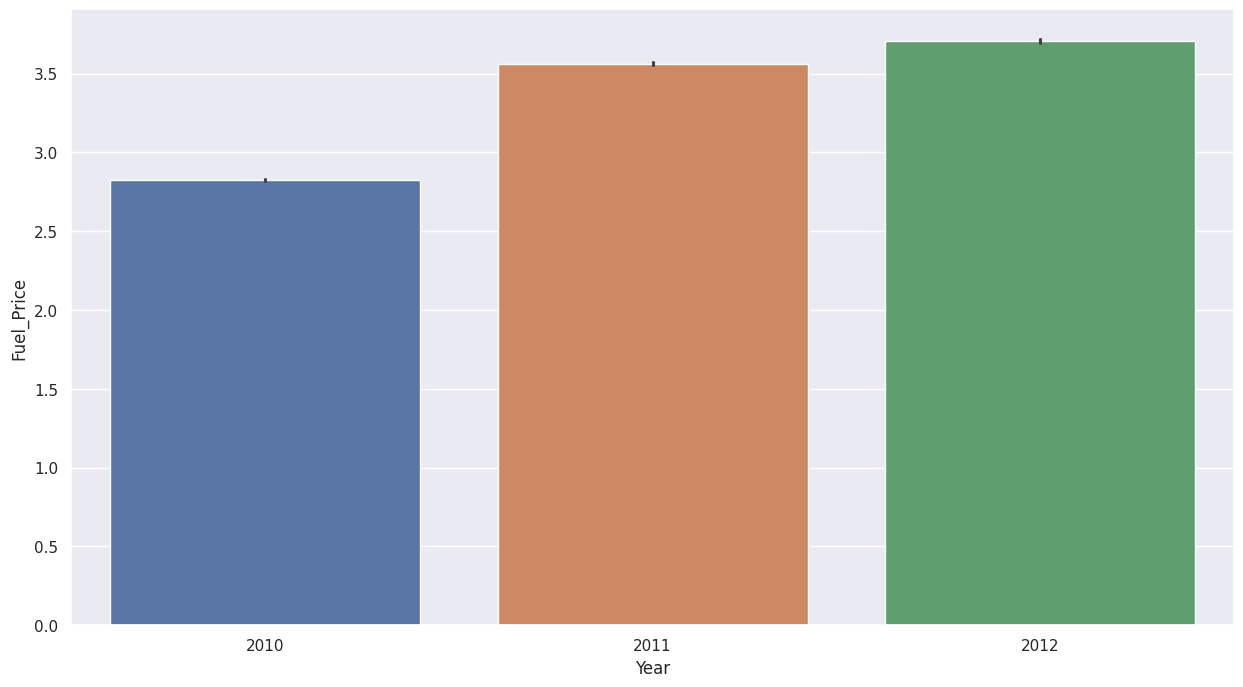

In [ ]:
import seaborn as sns
sns.set_theme(style='darkgrid')
tips = df
ax = sns.barplot(x="Year", y="Fuel_Price", data=tips, palette=sns.color_palette("deep", 10))
sns.set(rc={'figure.figsize': (10, 4)})

# Weekly Sales Vs Store

<ipython-input-18-6f1026833c7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips, palette=sns.color_palette("hls", 8))
<ipython-input-18-6f1026833c7f>:3: UserWarning: 
The palette list has fewer values (8) than needed (45) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips, palette=sns.color_palette("hls", 8))


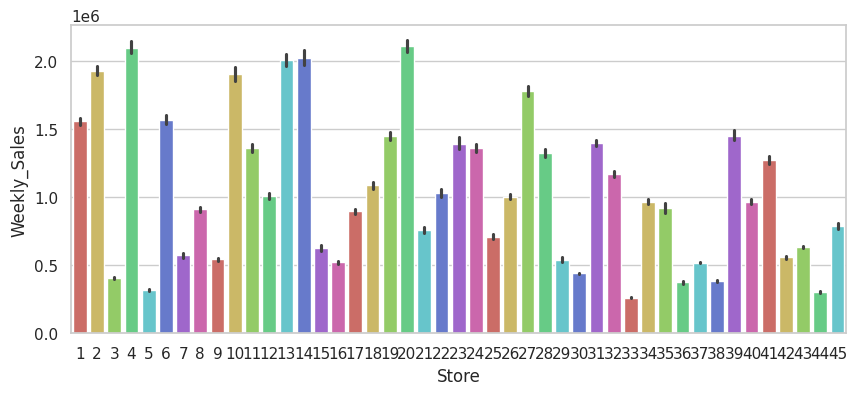

In [ ]:

sns.set_theme(style="whitegrid")
tips = df
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips, palette=sns.color_palette("hls", 8))
sns.set(rc={'figure.figsize': (24, 8)})

# Store Weekly Sales on Holidays Vs Non Holiday

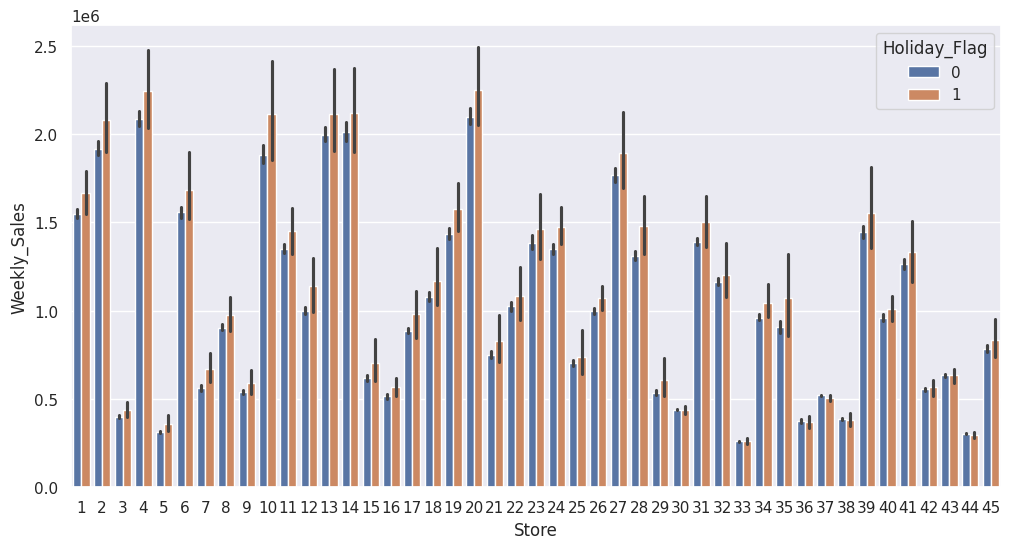

In [ ]:
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data= df)
plt.show()

# Store Vs Unemployment

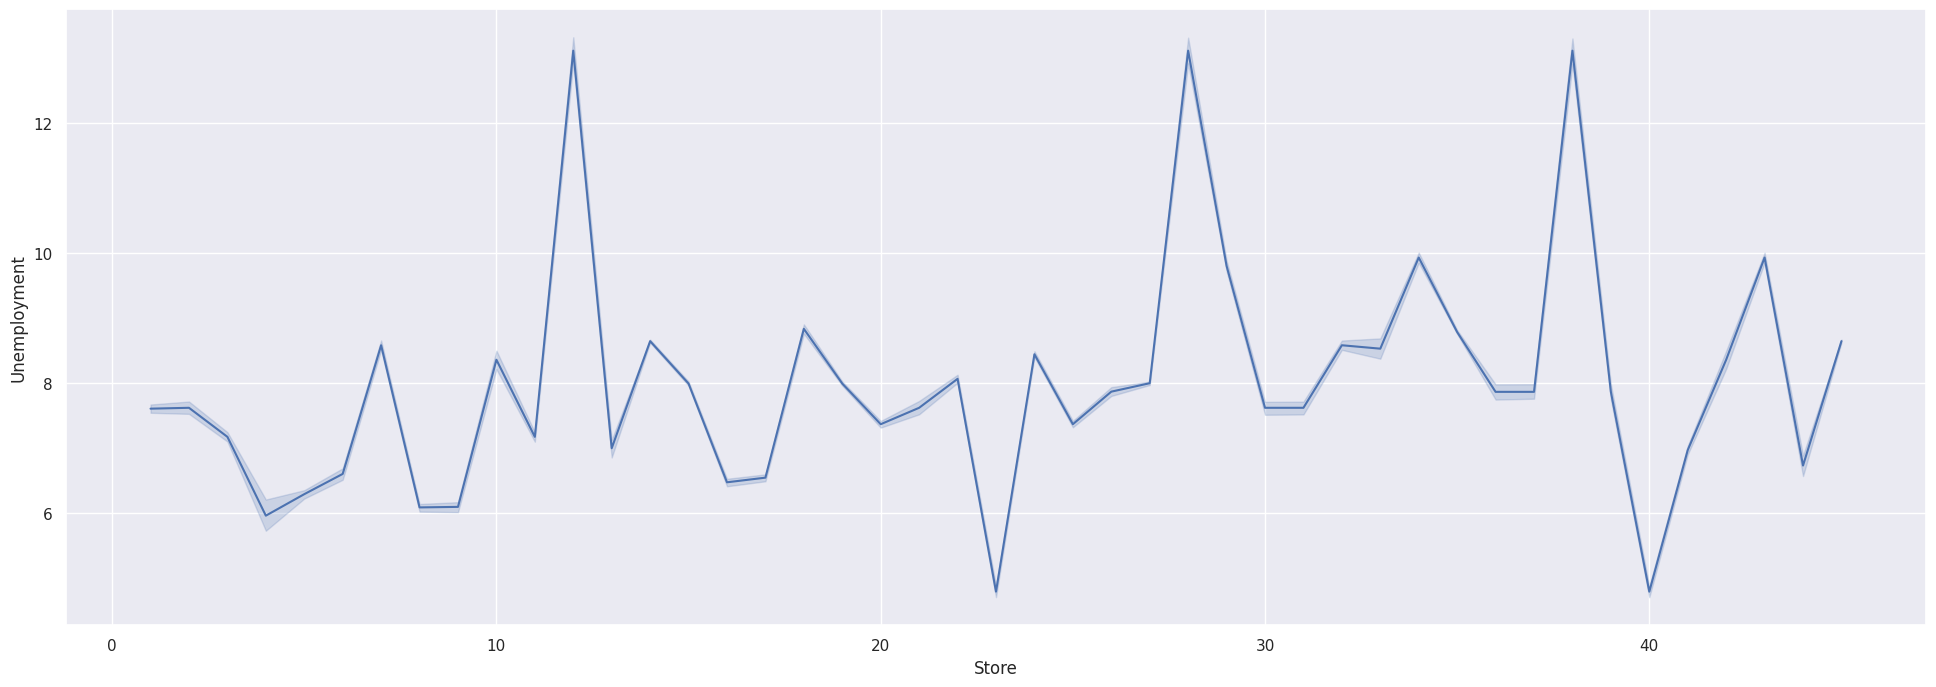

In [ ]:
tips = df

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=tips)
plt.show()

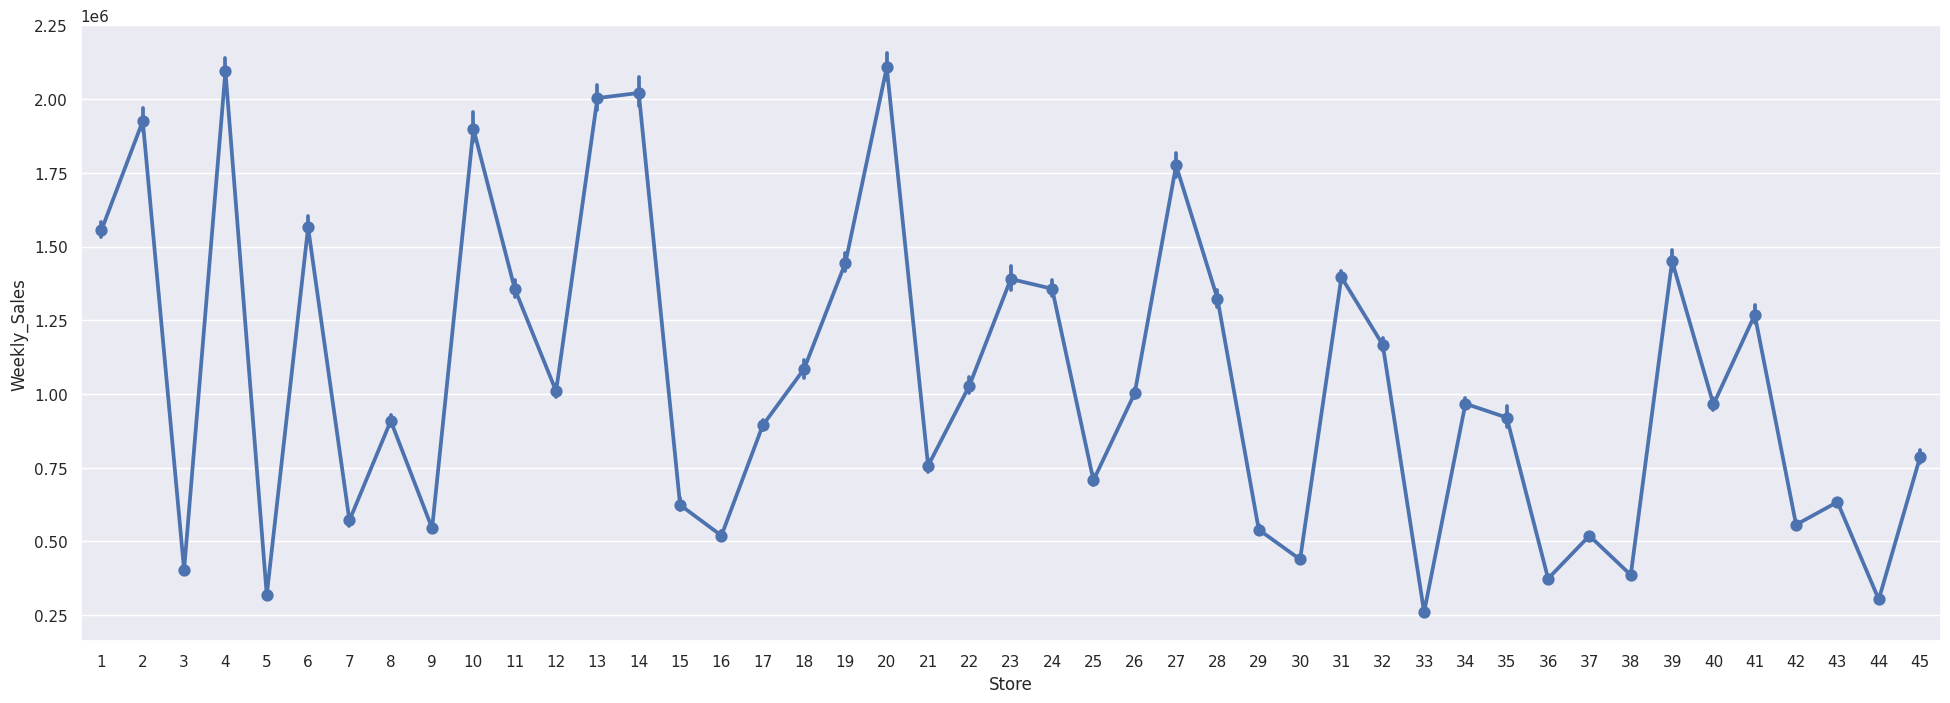

In [ ]:
tips=df

# draw pointplot
sns.pointplot(x ='Store',y = "Weekly_Sales",data = tips)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

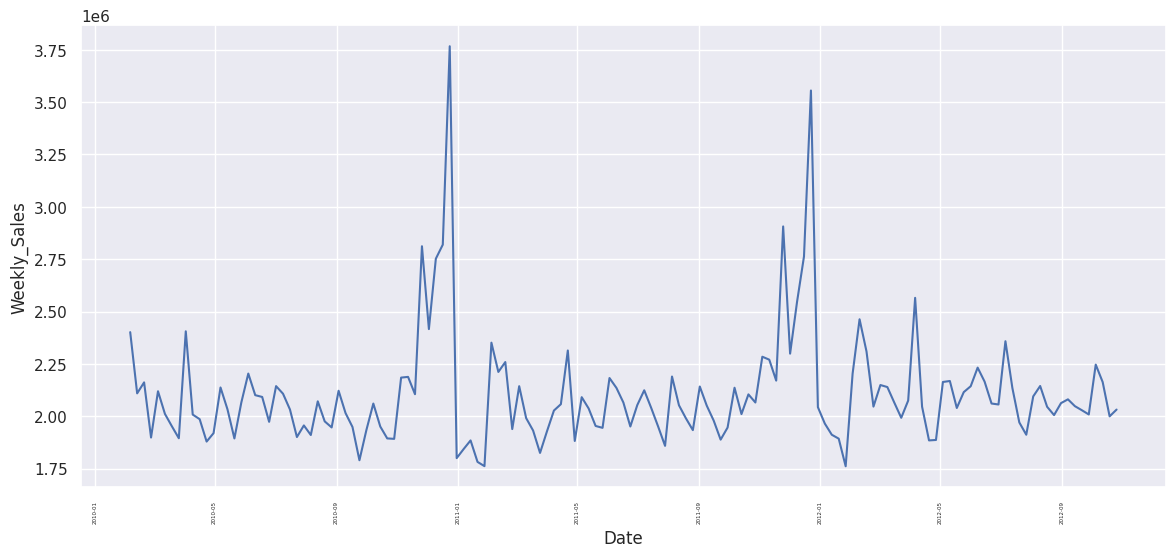

In [ ]:
# Visualizing the trend of Weekly Sales over time for a single store
plt.figure(figsize=(14, 6))
store_df = df[df['Store'] == 20]
sns.lineplot(x='Date', y='Weekly_Sales', data=store_df)
plt.xticks(rotation=90, fontsize = 4)  # Rotate the x-axis labels by 90 degrees
plt.show()

<Axes: xlabel='Month'>

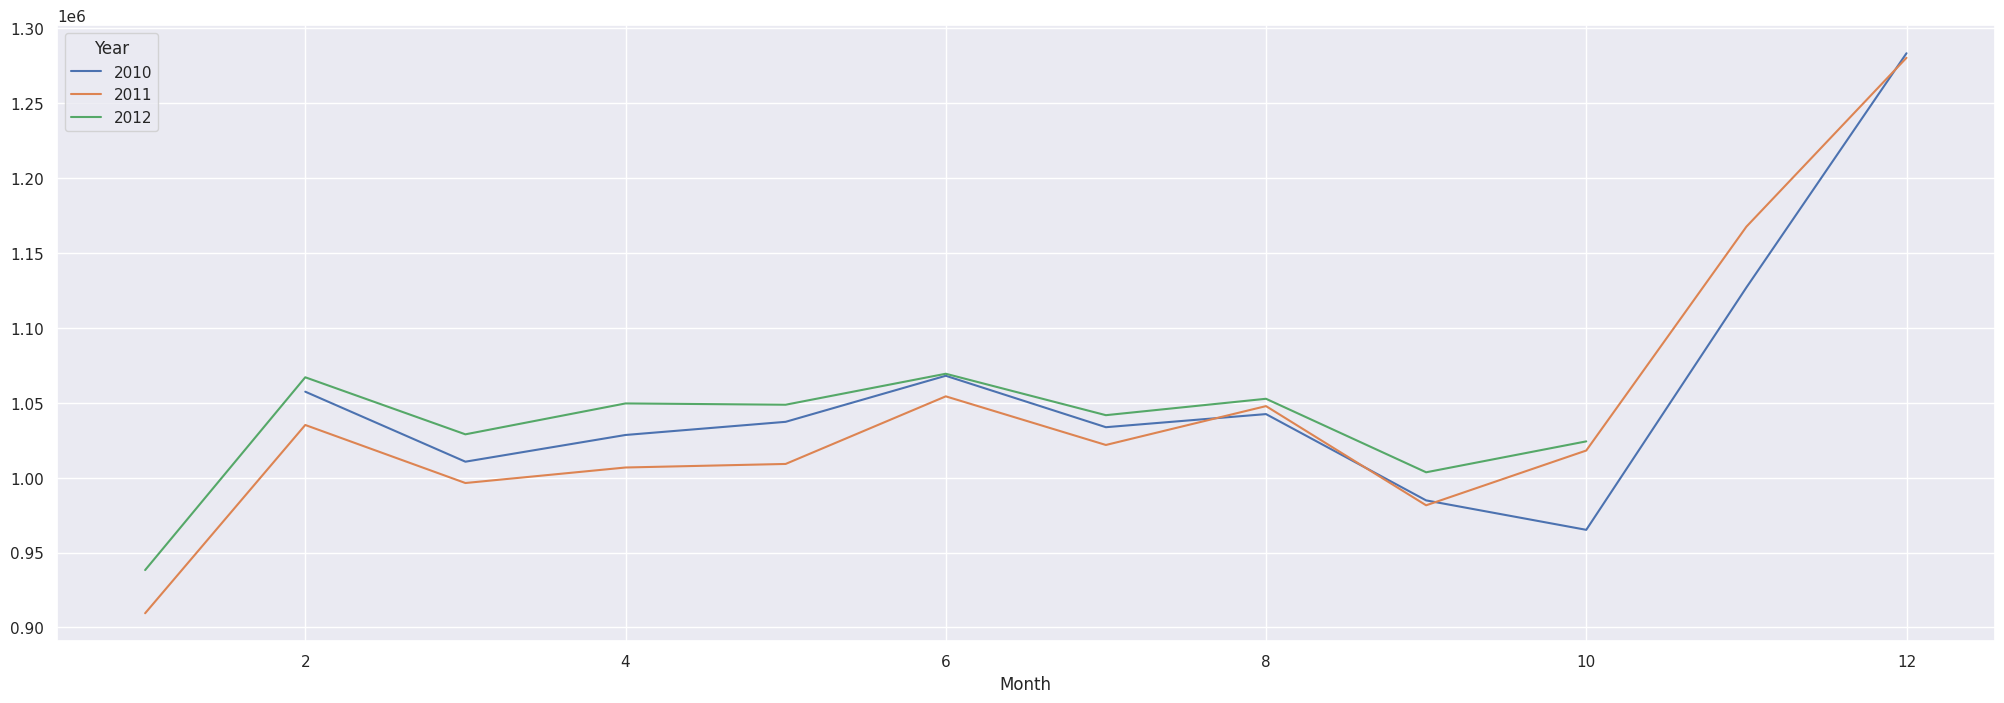

In [ ]:
month_wise_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot()

                     Store          Date  Weekly_Sales  Holiday_Flag  \
Store         1.000000e+00  2.274047e-15     -0.335332  1.323199e-16   
Date          2.274047e-15  1.000000e+00      0.006949 -1.328524e-02   
Weekly_Sales -3.353320e-01  6.949360e-03      1.000000  3.689097e-02   
Holiday_Flag  1.323199e-16 -1.328524e-02      0.036891  1.000000e+00   
Temperature  -2.265908e-02  1.453566e-01     -0.063810 -1.550913e-01   
Fuel_Price    6.002295e-02  7.714439e-01      0.009464 -7.834652e-02   
CPI          -2.094919e-01  7.715746e-02     -0.072634 -2.162091e-03   
Unemployment  2.235313e-01 -2.482029e-01     -0.106176  1.096028e-02   
Day           1.021602e-16  4.193021e-02     -0.017409  4.452608e-02   
Month         3.310988e-16  1.456512e-01      0.076143  1.229958e-01   
Year         -7.775798e-15  9.416680e-01     -0.018378 -5.678257e-02   

              Temperature  Fuel_Price       CPI  Unemployment           Day  \
Store           -0.022659    0.060023 -0.209492      0.2

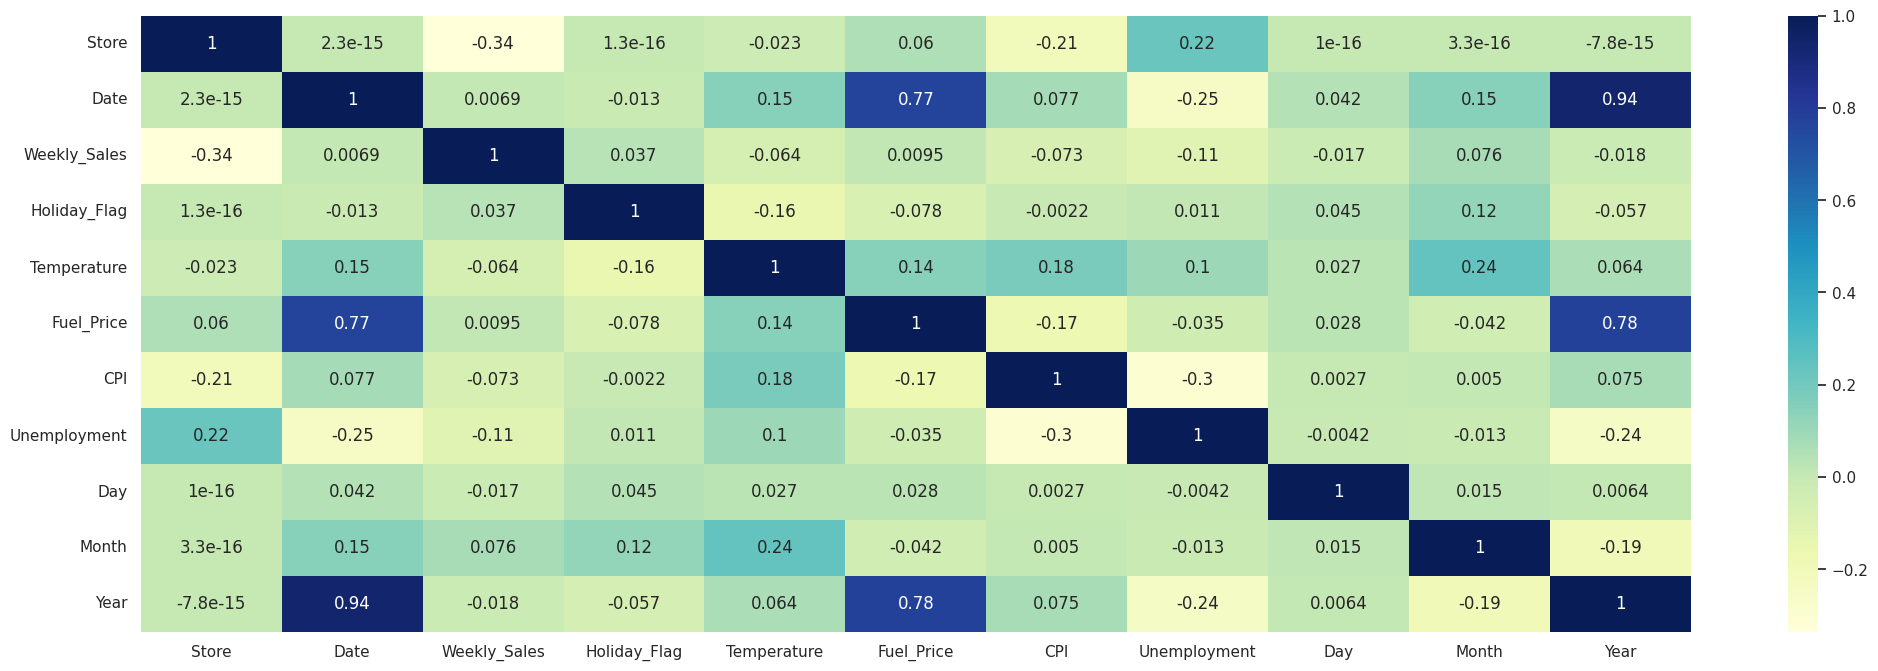

In [ ]:
 tips = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(tips.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(15,8)})

# displaying heatmap
plt.show()

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
143,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324,5,2,2010
286,3,2010-02-05,461622.22,0,45.71,2.572,214.424881,7.368,5,2,2010
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
572,5,2010-02-05,317173.10,0,39.70,2.572,211.653972,6.566,5,2,2010


In [ ]:
import plotly.express as px
x=data.iloc[:,[0,2]]
x.head()
dat=x.groupby('Store')['Weekly_Sales'].mean().reset_index()
fig = px.bar(dat, x='Store', y='Weekly_Sales', title='Average Weekly Sales by Store ID')
fig.show()

In [15]:
ans5=df.groupby('Store')['Weekly_Sales'].sum()
ans5.sort_values(ascending=False)[:10]
ans5.sort_values(ascending=True)[:10]
Top10=[20,4,14,13,2,10,27,6,1,39]
Bottom10=[33,44,5,36,38,3,30,37,16,29]
Difference=ans5[20]-ans5[33]
Difference

264237570.49999997

Q1.) E. Top performing stores according to the historical data.

- Top 10 performing stores are 20, 4, 14, 13, 2, 10, 27, 6, 1, 39 in descending order.


Q1.) F. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

- Bottom 10 worst performing stores are 33, 44, 5, 36, 38, 3, 30, 37, 16, 29 in ascending order. Worst performing store is Store ID : 33.

The difference between Highest performing store(Store Id: 20)and Lowest Performing store(Store Id: 33) is 264237570.50

# Impact of Temperature on Sales

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
143,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324,5,2,2010
286,3,2010-02-05,461622.22,0,45.71,2.572,214.424881,7.368,5,2,2010
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
572,5,2010-02-05,317173.10,0,39.70,2.572,211.653972,6.566,5,2,2010


# Impact of Temperature on Sales

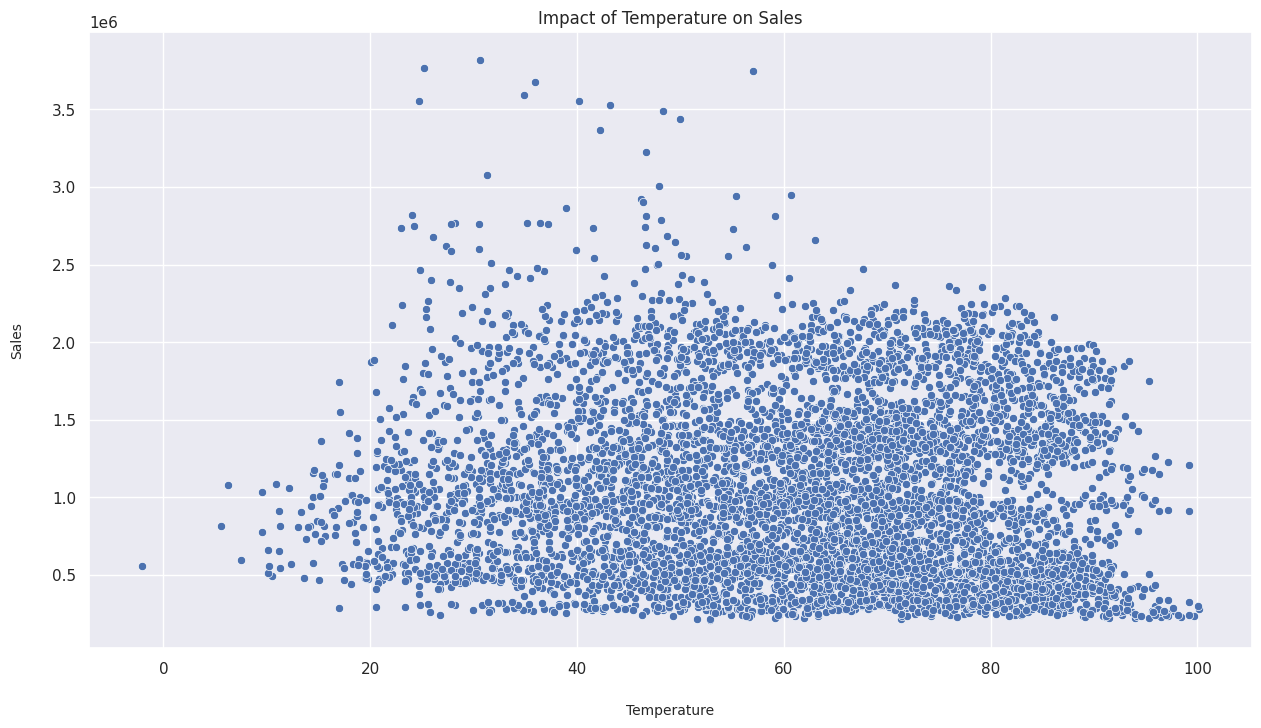

In [ ]:
 sns.scatterplot(x=df['Temperature'],y=df['Weekly_Sales'])
 plt.xlabel('Temperature',fontsize=10,labelpad=20)
 plt.ylabel('Sales',fontsize=10,labelpad=20)
 plt.title('Impact of Temperature on Sales')
 plt.show()

Q1.) C.Does temperature affect the weekly sales in any manner?

It has widely been known in the retail sector that weather has a profound effect on
sales. While warmer weather promotes sales, cold/harsh or extremely hot weather is
generally not a great encouragement for shoppers to get outdoors and spend money.
Generally speaking, temperatures between 40 to 70 degrees Fahrenheit are considered
as favorable for humans to live in considering they are not as hot or cold.
As seen above, the highest sales occur for most store between the range of
40 to 80 degrees Fahrenheit, thus proving the idea that pleasant weather encourages
higher sales. Sales are relatively lower for very low and very high temperatures but
seem to be adequately high for favorable climate conditions.

In [ ]:
df.sort_values(by='Temperature', ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
910,7,2011-02-04,558027.77,0,-2.06,3.011,191.762589,8.818,4,2,2011
3626,26,2011-01-28,817485.14,0,5.54,3.243,133.105968,7.907,28,1,2011
2336,17,2011-01-07,1083071.14,0,6.23,2.891,127.191774,6.866,7,1,2011
959,7,2012-01-13,593875.46,0,7.46,3.077,196.733052,8.256,13,1,2012
5628,40,2011-01-28,775910.43,0,9.51,3.243,133.105968,5.114,28,1,2011
...,...,...,...,...,...,...,...,...,...,...,...
1597,12,2010-07-23,912403.67,0,99.22,3.112,126.128355,14.180,23,7,2010
5315,38,2010-07-23,328336.85,0,99.22,3.112,126.128355,14.180,23,7,2010
4657,33,2011-08-26,237095.82,0,99.66,3.663,129.283258,8.442,26,8,2011
4707,33,2012-08-10,297753.49,0,100.07,3.811,130.756161,7.147,10,8,2012


# Impact of Unemployment on Sales

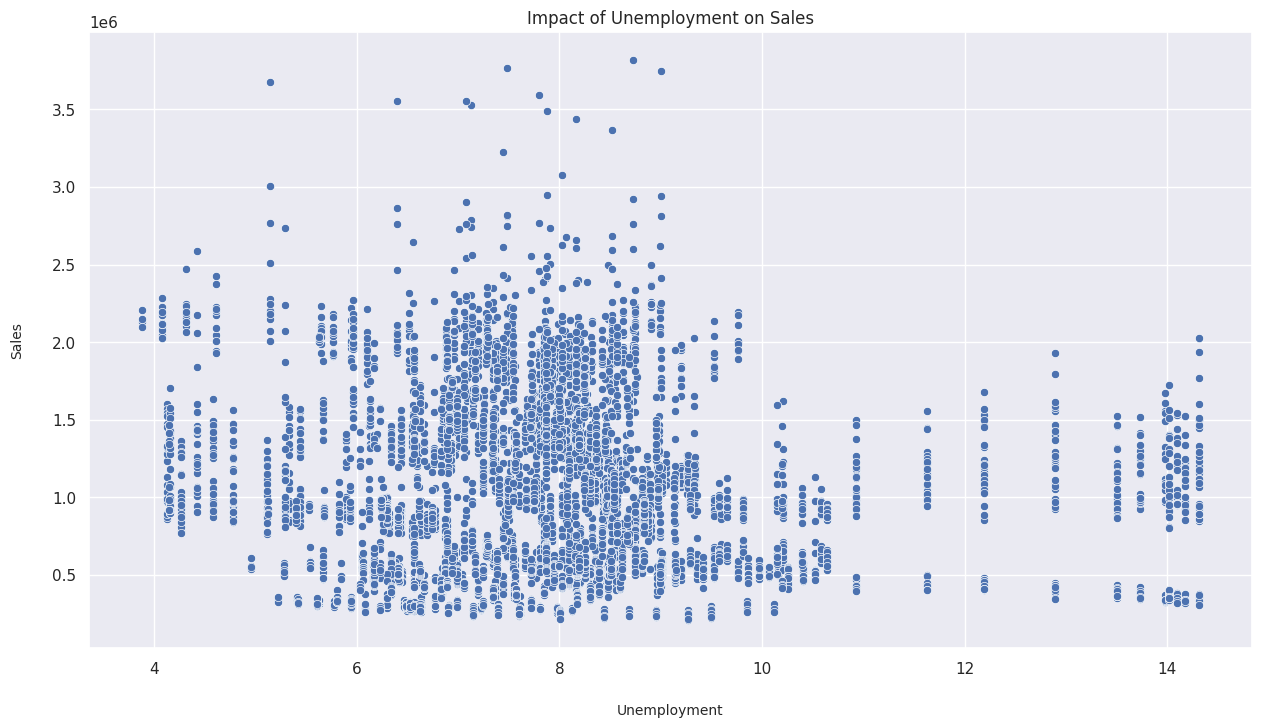

In [ ]:
sns.scatterplot(x=df['Unemployment'], y=df['Weekly_Sales'])
plt.xlabel('Unemployment',fontsize=10,labelpad=20)
plt.ylabel('Sales',fontsize=10,labelpad=20)
plt.title('Impact of Unemployment on Sales')
plt.show()

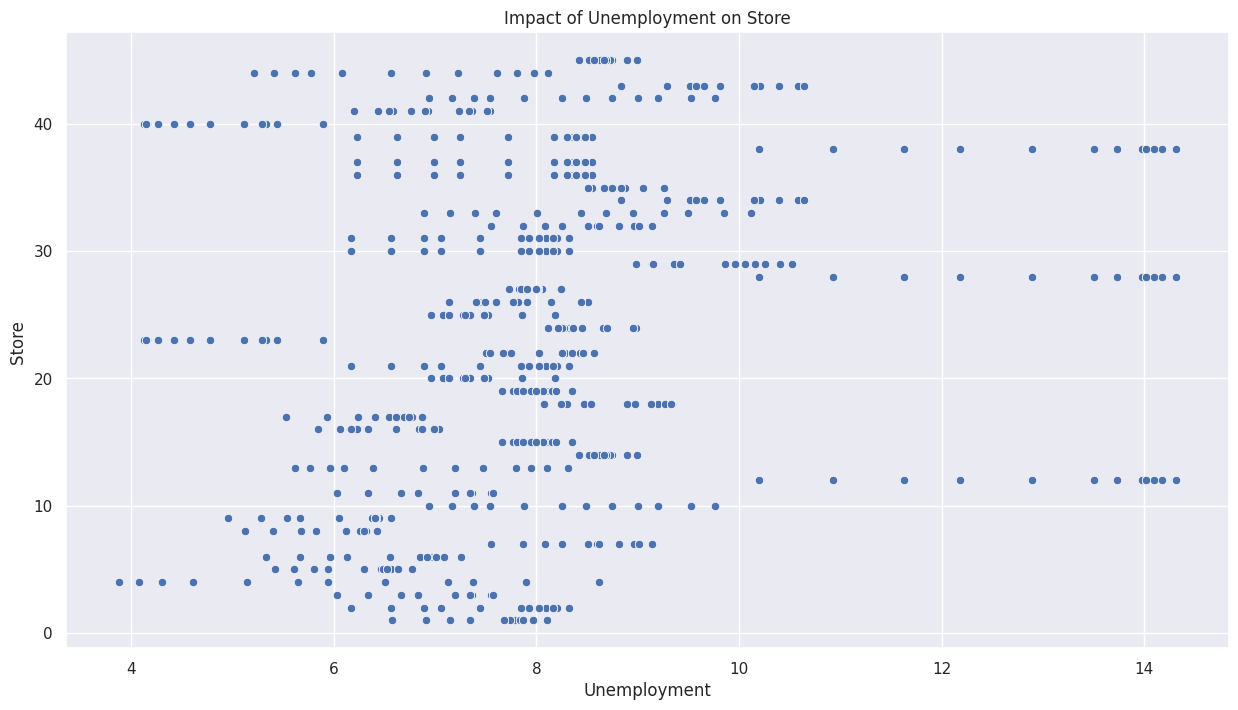

In [ ]:
sns.scatterplot(x=df['Unemployment'], y=df['Store'])
plt.xlabel('Unemployment')
plt.ylabel('Store ')
plt.title('Impact of Unemployment on Store')
plt.show()

In [ ]:
ans1=df[df['Unemployment']>=10]

In [ ]:
ans1=ans1['Store']
ans1.unique()

array([12, 28, 29, 33, 38, 34, 43])

Q1.)
A. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Ans: Spending sharply drops on the onset of unemployment; a higher unemployment index would generally result in a dip in sales as individuals tend to decrease overall spending.
In our dataset, unemployment is presented through an index of the unemployment rate during that week in the region of the store. From our scatter plot, it is easier to gather
the following information:
1. There seems to be a visible decrease in sales when the
unemployment index is higher than 9
2. When the unemployment index is higher than 11, there is a a steep decrease in the average sales.
3. Highest recorded sales for store occur around the index of 7 to 9; this gives ambiguous ideas about the impact of unemployment on sales for each of the stores.

Store Id : 12, 28, 29, 33, 38, 34, 43 seems to be suffering the most because of unemployment.

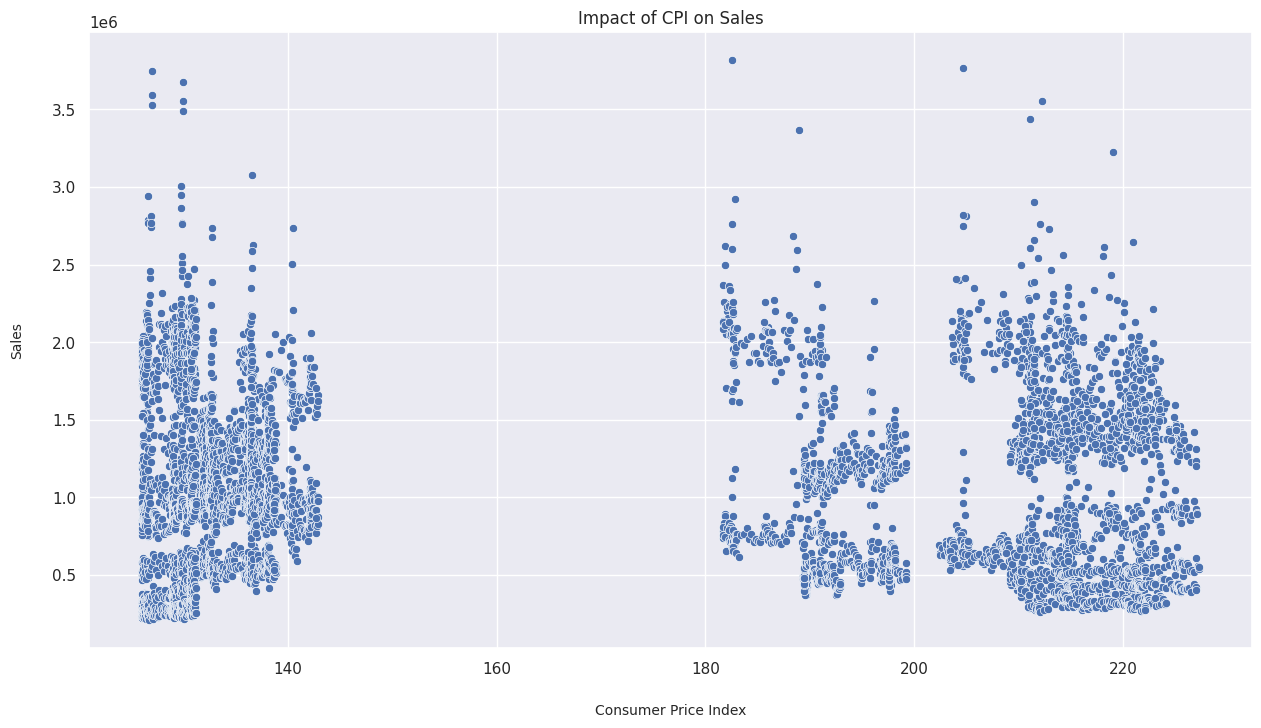

In [ ]:
sns.scatterplot(x=df['CPI'], y=df['Weekly_Sales'])
plt.xlabel('Consumer Price Index',fontsize=10,labelpad=20)
plt.ylabel('Sales',fontsize=10,labelpad=20)
plt.title('Impact of CPI on Sales')
plt.show()

Q1.) D. How is the Consumer Price index affecting the weekly sales of various stores?

In layman’s terms, CPI is a measure that assesses the price changes that are associated with the cost of living for each individual. CPI is a great measure for the government when studying inflation (i.e. an increase in the prices of a representative basket of
goods consumed) and is often used to evaluate and adjust government assistance needs
based on income levels and provide wage adjustments with respect to changing cost of
living expenses. A higher CPI generally means that the price of goods has increased
and that an individual needs to spend more money to maintain the same standard of
living.
In our scatter plot above, we can identify three different clusters around different
ranges of CPI; while there seems to be no visible relationship between the change in
CPI and weekly sales for Walmart stores (sales still occur at high CPI rates).

In [ ]:
 df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
143,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324,5,2,2010
286,3,2010-02-05,461622.22,0,45.71,2.572,214.424881,7.368,5,2,2010
429,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623,5,2,2010
572,5,2010-02-05,317173.10,0,39.70,2.572,211.653972,6.566,5,2,2010


# 2. PREDICTING / FORECASTING

In [ ]:
cur_data=df.iloc[:,[0,1,3,4,5,6,7,2]]

In [ ]:
cur_data.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2010-02-05,0,42.31,2.572,211.096358,8.106,1643690.90
143,2,2010-02-05,0,40.19,2.572,210.752605,8.324,2136989.46
286,3,2010-02-05,0,45.71,2.572,214.424881,7.368,461622.22
429,4,2010-02-05,0,43.76,2.598,126.442065,8.623,2135143.87
572,5,2010-02-05,0,39.70,2.572,211.653972,6.566,317173.10


In [ ]:
cur_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


In [ ]:
#cur_df.index=cur_df['Date']
#cur_df.drop(['Date'],axis=1,inplace=True)

In [ ]:
store20=cur_data[cur_data['Store']==20]

In [ ]:
store20.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
2717,20,2010-02-05,0,25.92,2.784,204.247194,8.187,2401395.47
2718,20,2010-02-12,1,22.12,2.773,204.385747,8.187,2109107.90
2719,20,2010-02-19,0,25.43,2.745,204.432100,8.187,2161549.76
2720,20,2010-02-26,0,32.32,2.754,204.463087,8.187,1898193.95
2721,20,2010-03-05,0,31.75,2.777,204.494073,8.187,2119213.72


In [ ]:
 st20=store20.iloc[:,[1,7]]

In [ ]:
st20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 2717 to 2859
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
st20.index=st20['Date']

In [ ]:
st20.head()

,Date,Weekly_Sales
Date,,
2010-02-05,2010-02-05,2401395.47
2010-02-12,2010-02-12,2109107.90
2010-02-19,2010-02-19,2161549.76
2010-02-26,2010-02-26,1898193.95
2010-03-05,2010-03-05,2119213.72


In [ ]:
st20.drop(['Date'],axis=1,inplace=True)

<ipython-input-47-21cd3e885630>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

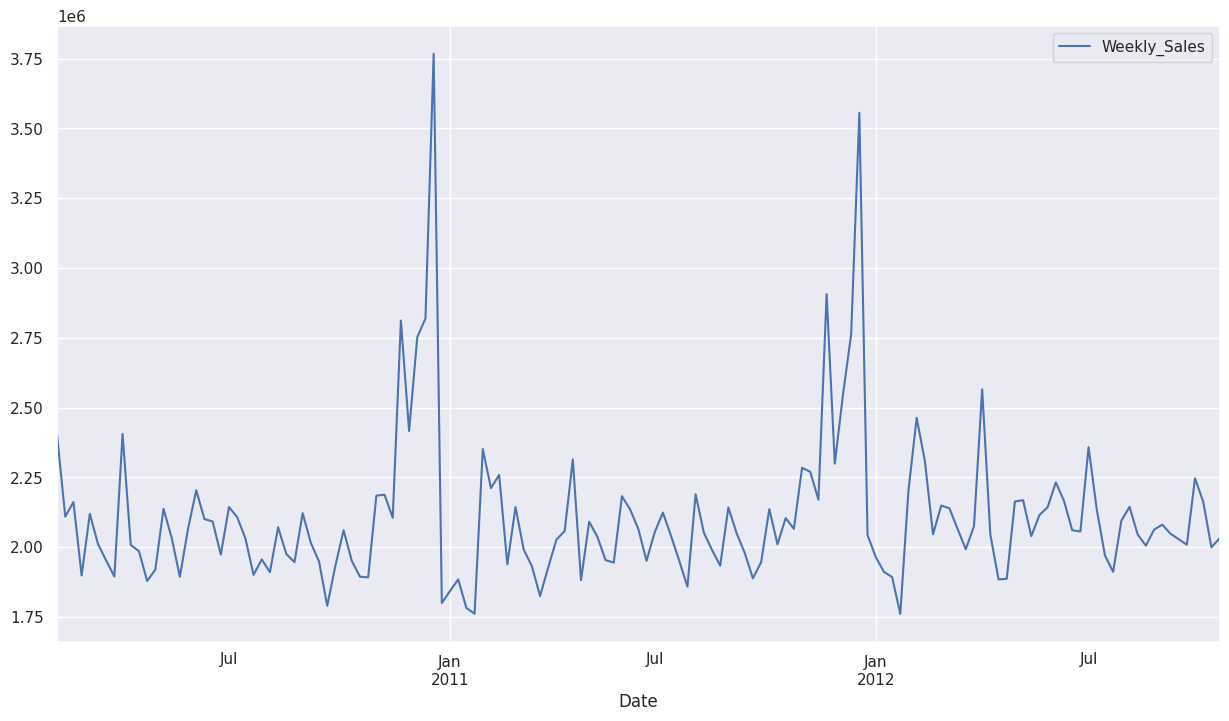

In [ ]:
st20.plot()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

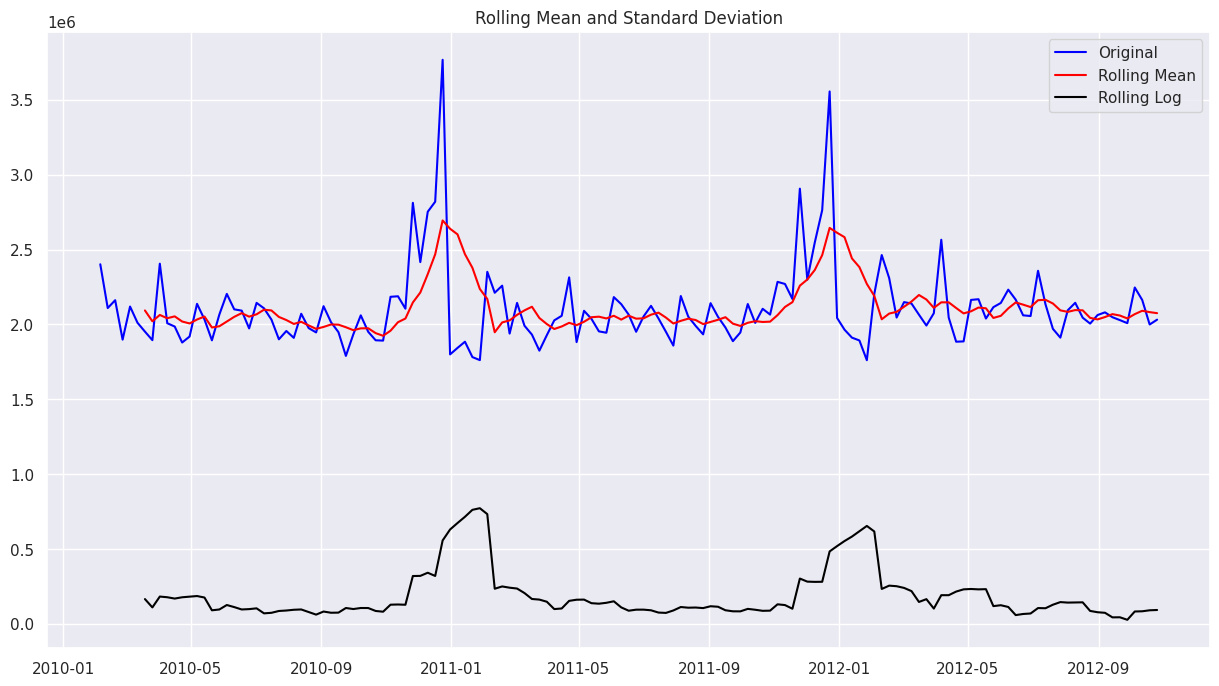

In [ ]:
mean_log=st20.rolling(window=7).mean()
std_log=st20.rolling(window=7).std()
plt.plot(st20,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Log')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')

In [ ]:
# CHECKING THE STASTIONARITY
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf,adfuller
result=adfuller(st20['Weekly_Sales'])

In [ ]:
result

(-5.39373869285483,
 3.4912952838128377e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3553.6598733693677)

In [ ]:
p_value=result[1]
p_value

3.4912952838128377e-06

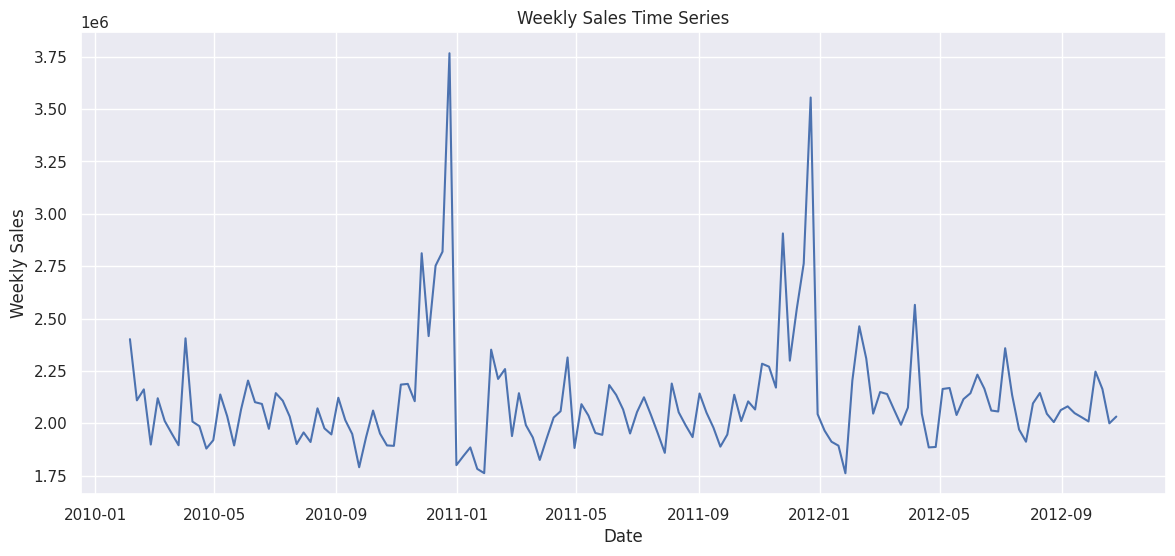

In [ ]:
# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(st20['Weekly_Sales'])
plt.title('Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

1.) B. If the weekly sales show a seasonal trend, when and what could be the reason?

- This graph shows the average weekly sales of the company across all its stores in the given timeframe. The graph shows that the company had a steady increase in sales over the months, with a few dips here and there.

The highest average weekly sales were seen in December, while the lowest was in May and June. This indicates that the company is doing well in terms of sales, as well as having a consistent customer base.

So we conclude the seasonality is due to hot and cold weathers primarily but other factors like CPI and unemployment also contribute to seasonality.

In [ ]:
#Graph Seasonal Decompose

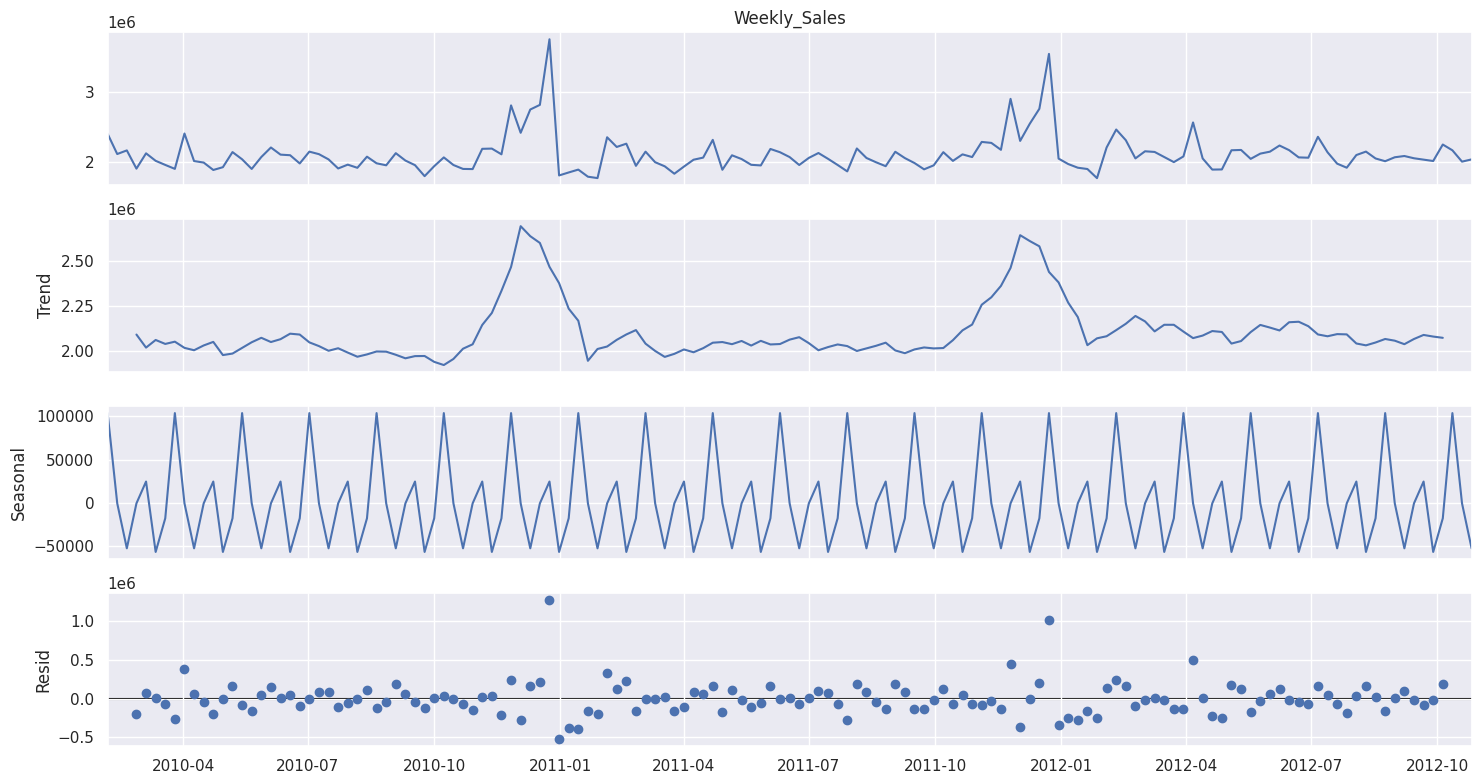

In [ ]:
 curr_seasonal_decompose=seasonal_decompose(st20['Weekly_Sales'].dropna(),period=7)
 curr_seasonal_decompose.plot();

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
arima_model=auto_arima(st20['Weekly_Sales'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3974.854, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3991.763, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3971.424, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3977.707, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4574.703, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3972.263, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3972.813, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3974.255, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.850 seconds


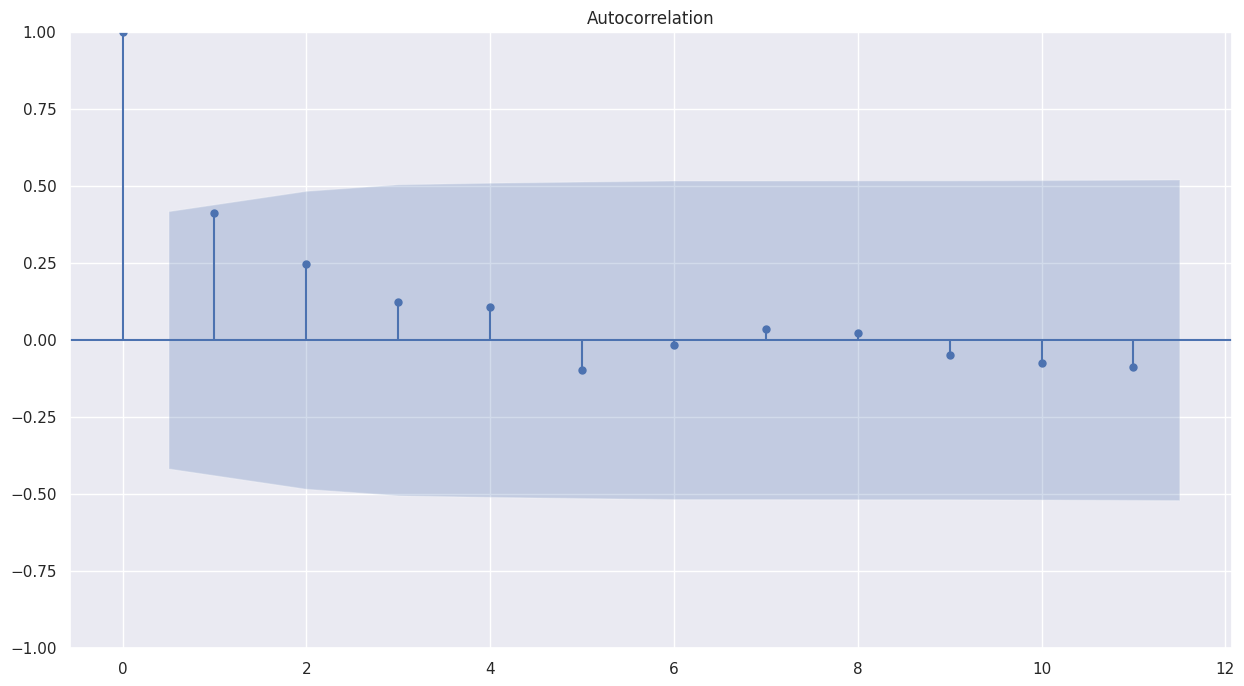

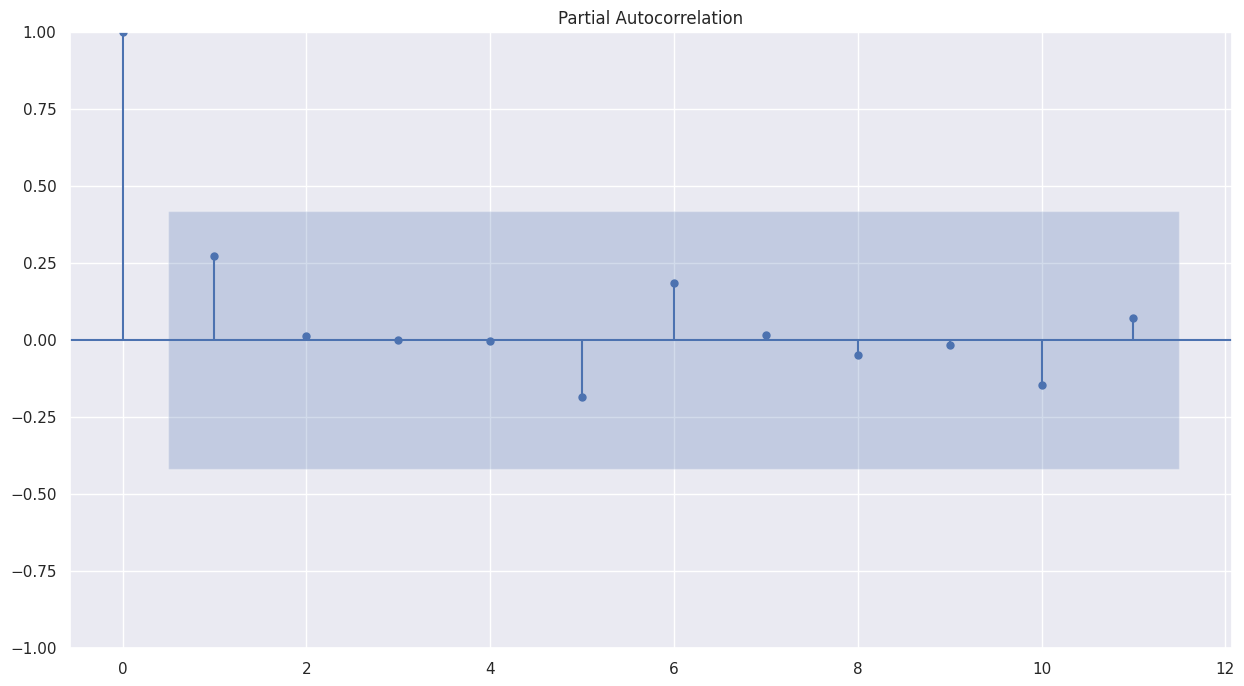

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
acf_plot=acf(st20)
pacf_plot=pacf(st20)
plot_acf(acf_plot);
plot_pacf(pacf_plot);

In [ ]:
st20.shape

(143, 1)

In [ ]:
 from statsmodels.tsa.arima.model import ARIMA
 train=st20.iloc[:128]['Weekly_Sales']
 test=st20.iloc[129:]['Weekly_Sales']
 model=ARIMA(train,order=(1,0,0))
 model=model.fit()
 model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  128
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1780.982
Date:                Wed, 15 May 2024   AIC                           3567.964
Time:                        13:12:29   BIC                           3576.520
Sample:                    02-05-2010   HQIC                          3571.440
                         - 07-13-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.114e+06   5.02e+04     42.064      0.000    2.02e+06    2.21e+06
ar.L1          0.3804      0.042      9.046      0.000       0.298       0.463
sigma2       7.12e+10      0.359   1.98e+11      0.000    7.12e+10    7.12e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               481.26
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                             1.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<ipython-input-62-e16c29b308ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

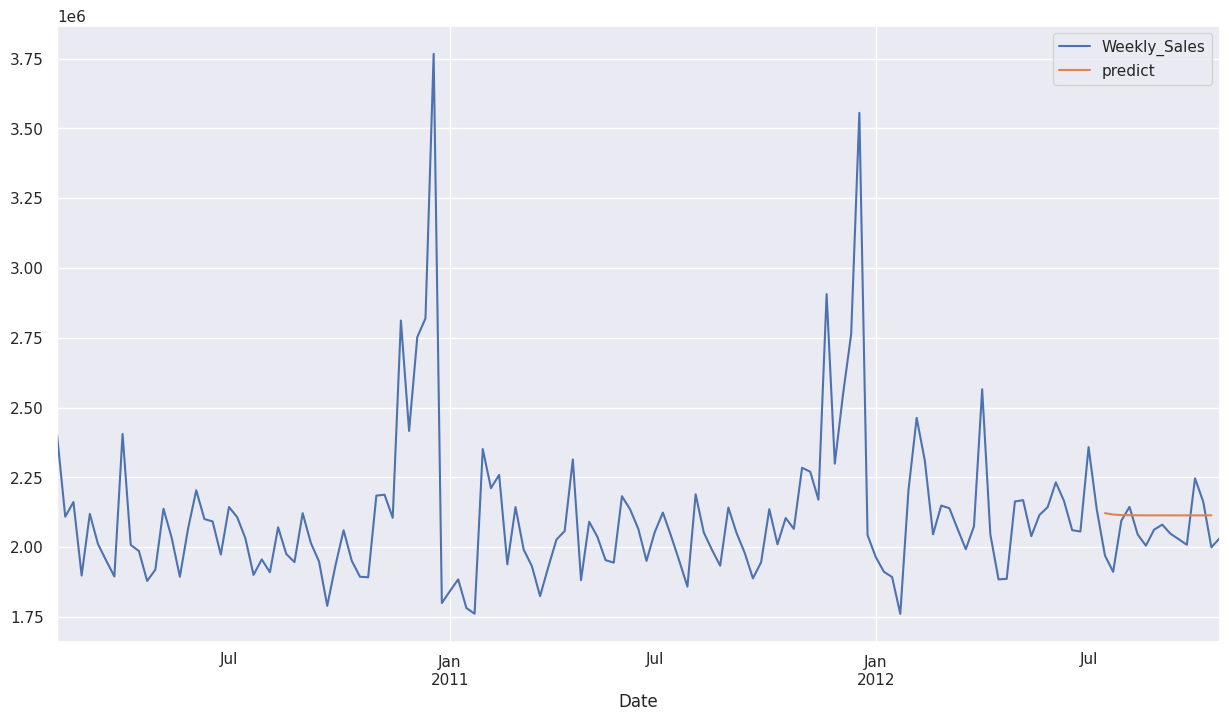

In [ ]:
 st20['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
 st20[['Weekly_Sales','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [ ]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,7),enforce_stationarity=True,enforce_invertibility=True)
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<ipython-input-65-e16c29b308ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

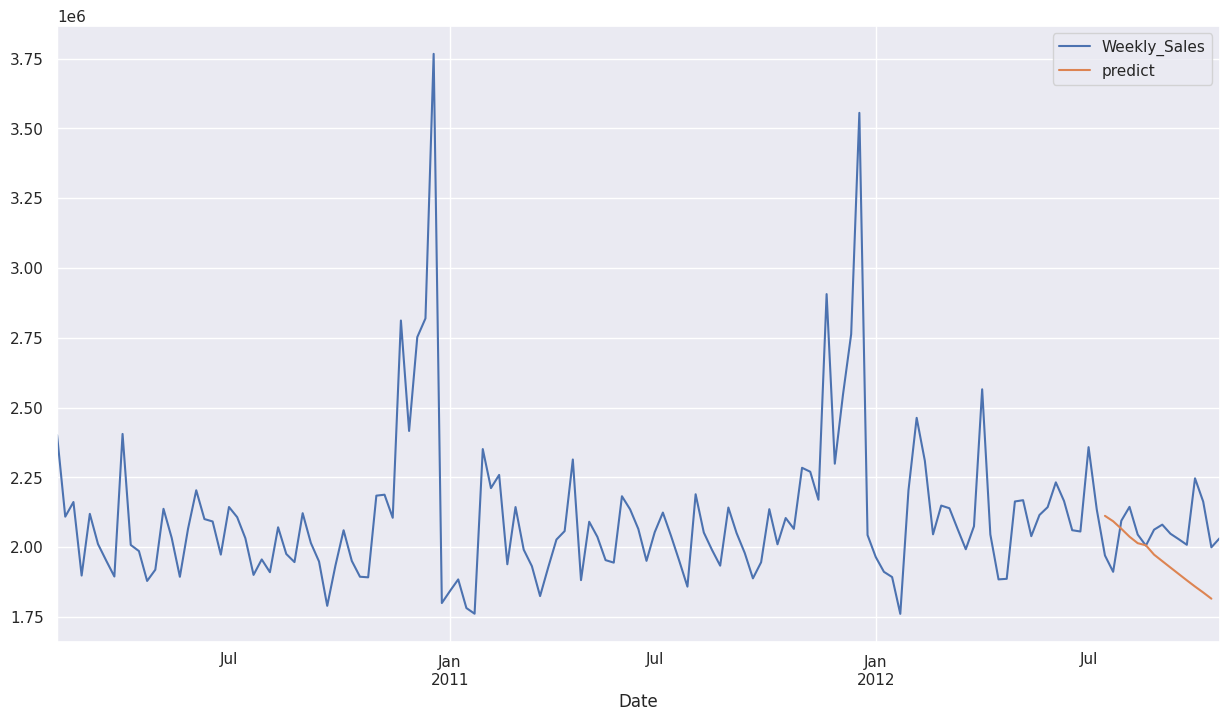

In [ ]:
 st20['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
 st20[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

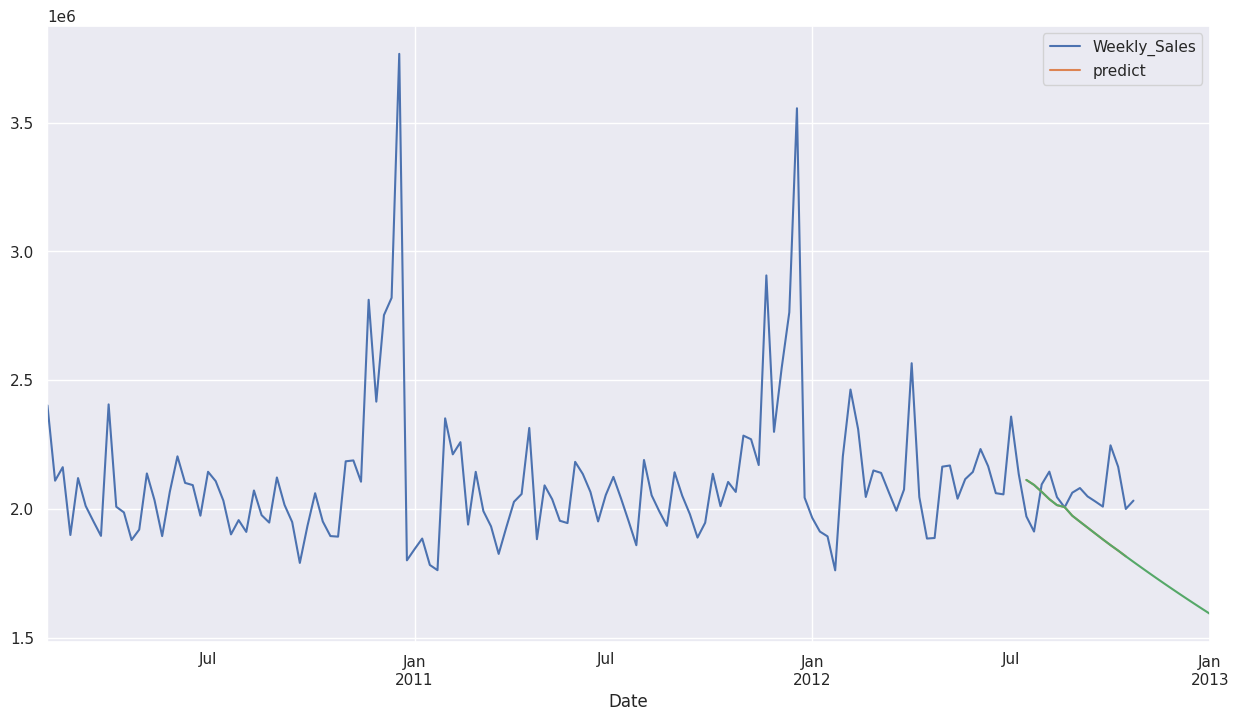

In [ ]:
forecast=model.forecast(steps=25)
st20.plot()
forecast.plot()

In [ ]:
st=st20.iloc[:,[0]]
st.head()


,Weekly_Sales
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

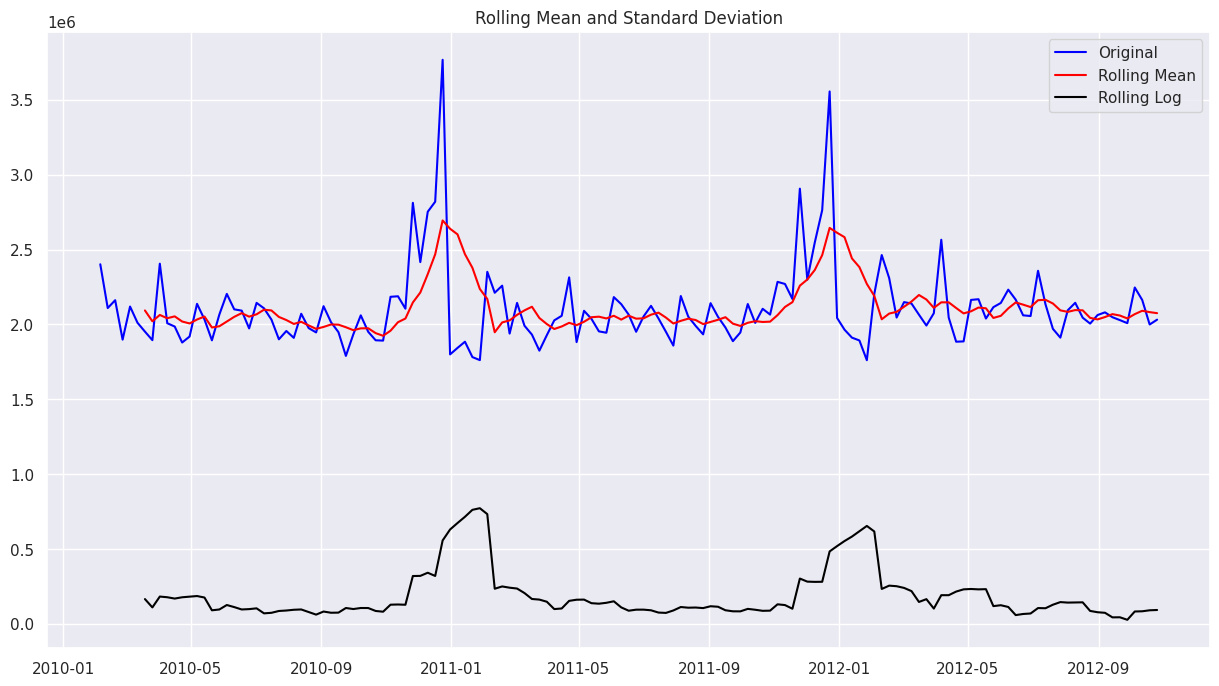

In [ ]:
mean_log=st.rolling(window=7).mean()
std_log=st.rolling(window=7).std()
plt.plot(st,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Log')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')

<Axes: xlabel='Date'>

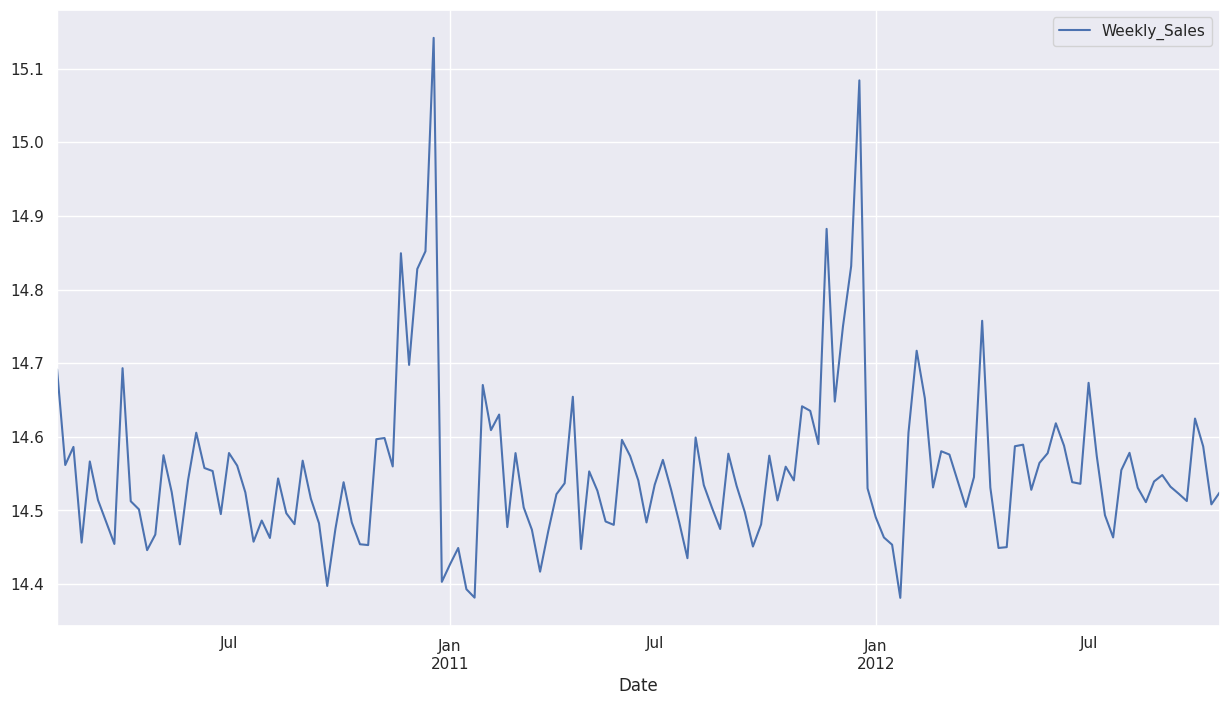

In [ ]:
first_log=np.log(st)
first_log=first_log.dropna()
first_log.plot()

In [ ]:
res=adfuller(first_log['Weekly_Sales'])
res

(-5.61538924379743,
 1.177612378297545e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 -217.47248716439867)

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

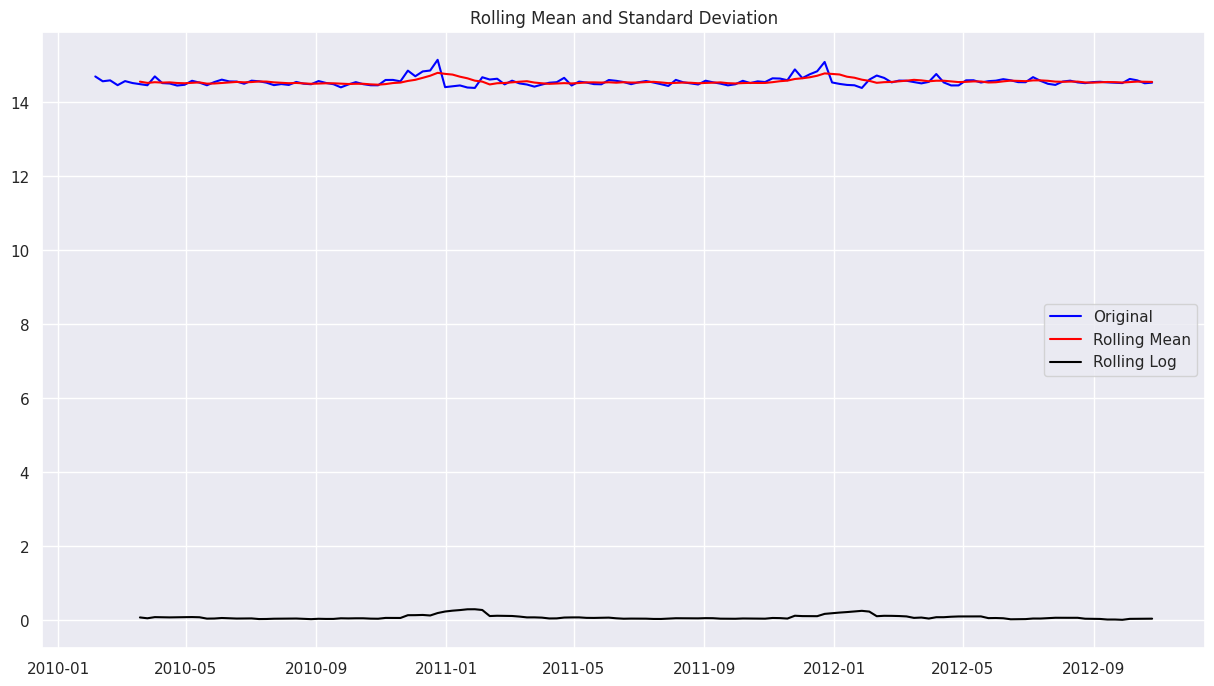

In [ ]:
mean_log=first_log.rolling(window=7).mean()
std_log=first_log.rolling(window=7).std()
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Log')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

In [ ]:
new_df=first_log-mean_log
new_df=new_df.dropna()
new_df.head()

,Weekly_Sales
Date,
2010-03-19,-0.067292
2010-03-26,-0.063134
2010-04-02,0.156719
2010-04-09,-0.013416
2010-04-16,-0.030885


In [ ]:
res=adfuller(new_df['Weekly_Sales'])
res

(-7.753011126501717,
 9.904681988186652e-12,
 4,
 132,
 {'1%': -3.4808880719210005,
  '5%': -2.8836966192225284,
  '10%': -2.5785857598714417},
 -230.26942679830222)

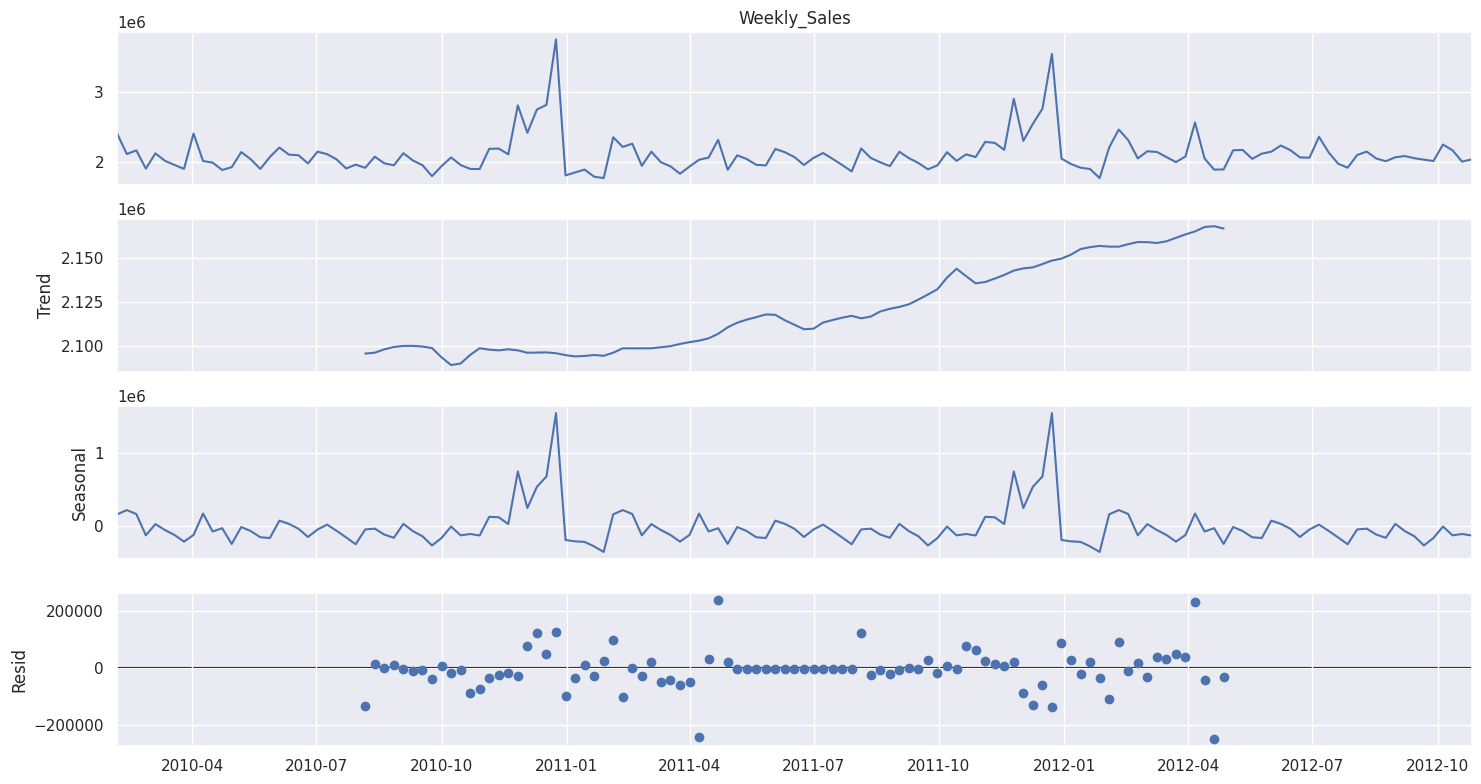

In [ ]:
old_seasonal_decompose=seasonal_decompose(st['Weekly_Sales'].dropna())
old_seasonal_decompose.plot();
new_seasonal_decompose=seasonal_decompose(new_df['Weekly_Sales'].dropna())

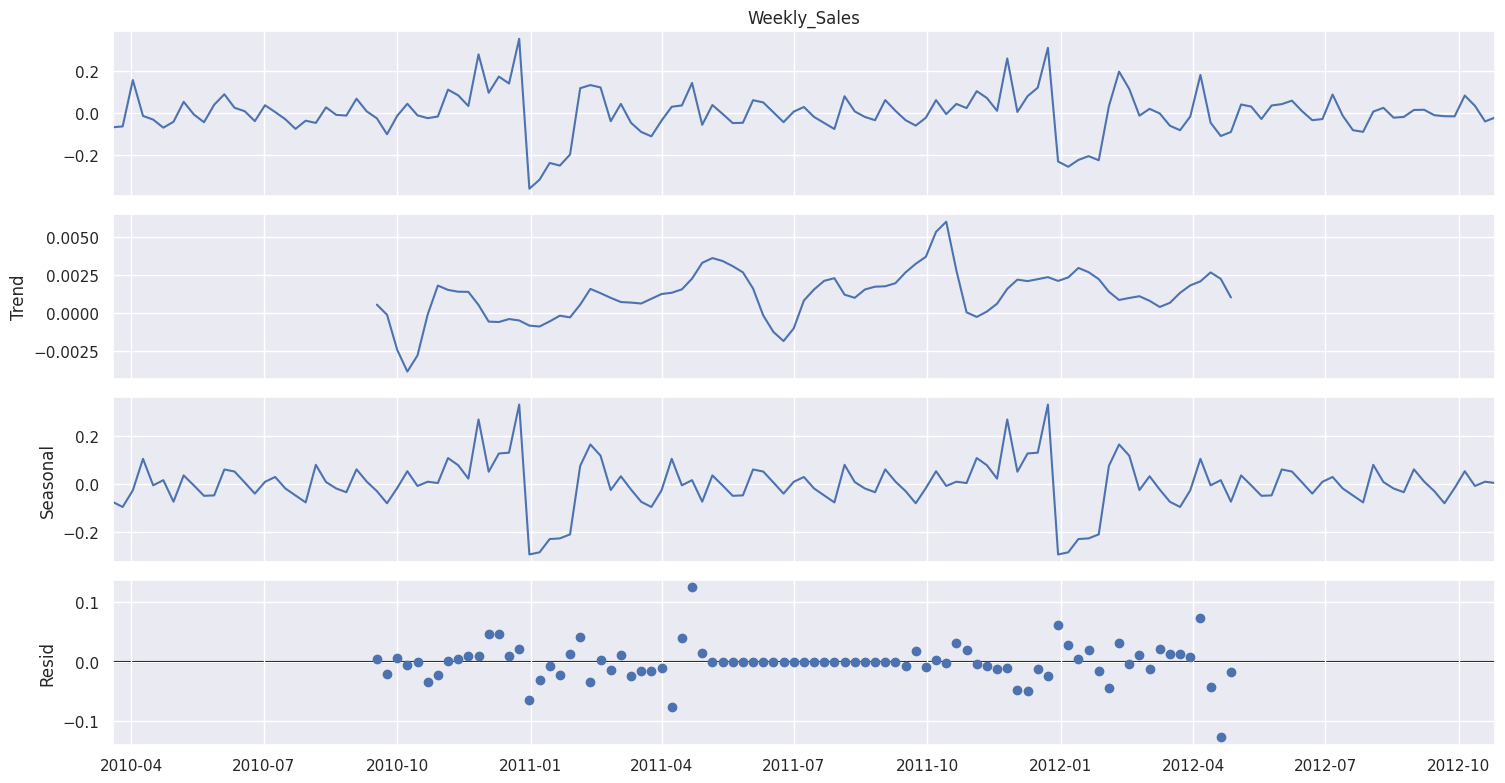

In [ ]:
new_seasonal_decompose.plot();

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

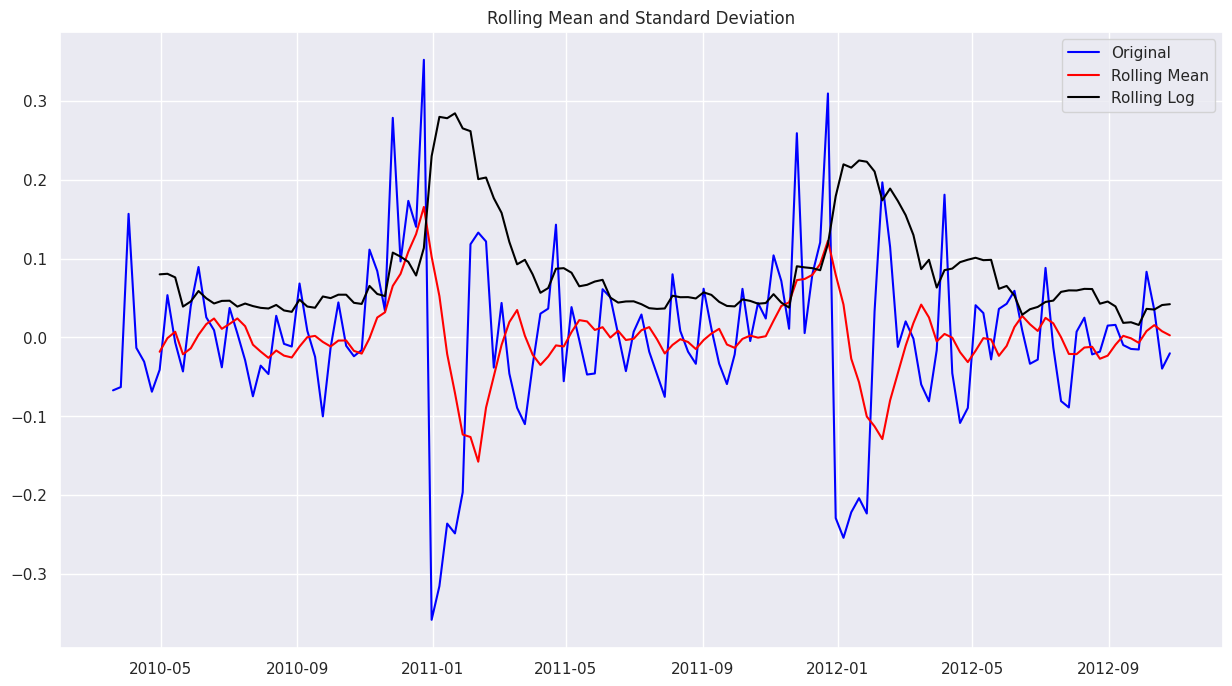

In [ ]:
mean_log=new_df.rolling(window=7).mean()
std_log=new_df.rolling(window=7).std()
plt.plot(new_df,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Log')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

In [ ]:
from pmdarima import auto_arima
new_arima_model=auto_arima(new_df['Weekly_Sales'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-251.786, Time=2.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-223.627, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-241.512, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-239.484, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-225.627, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-253.350, Time=1.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-239.772, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-239.920, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-240.400, Time=0.74 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-239.345, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.79 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 10.141 seconds


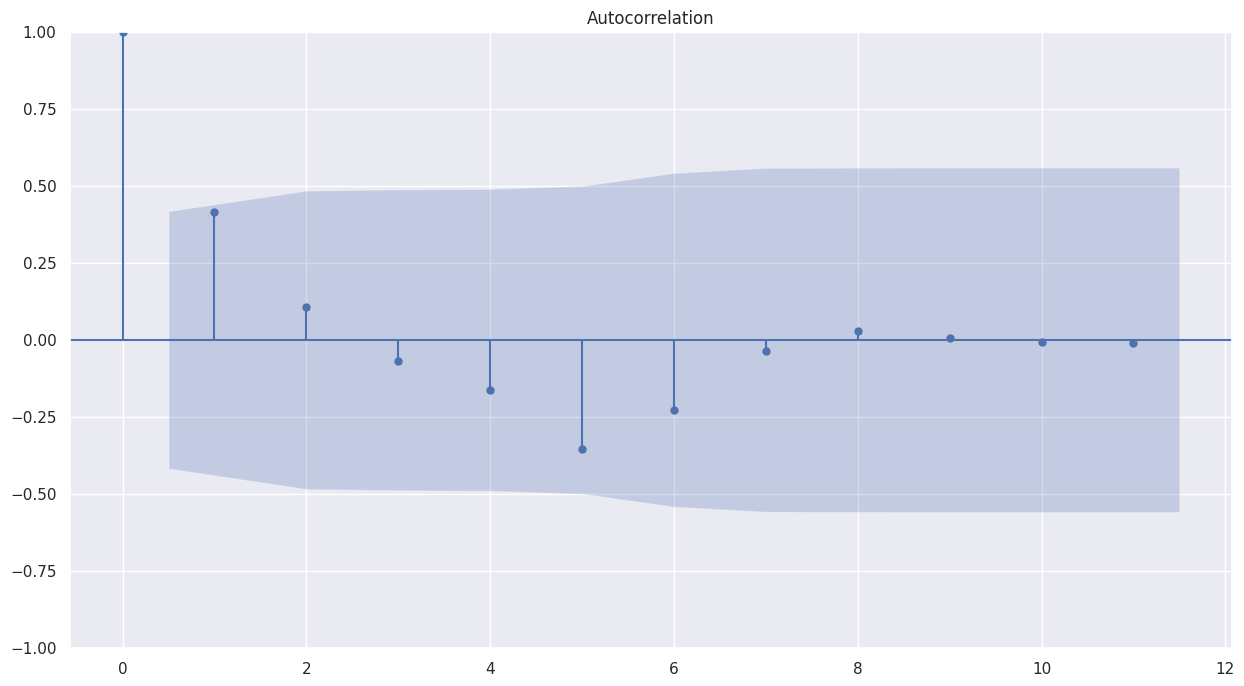

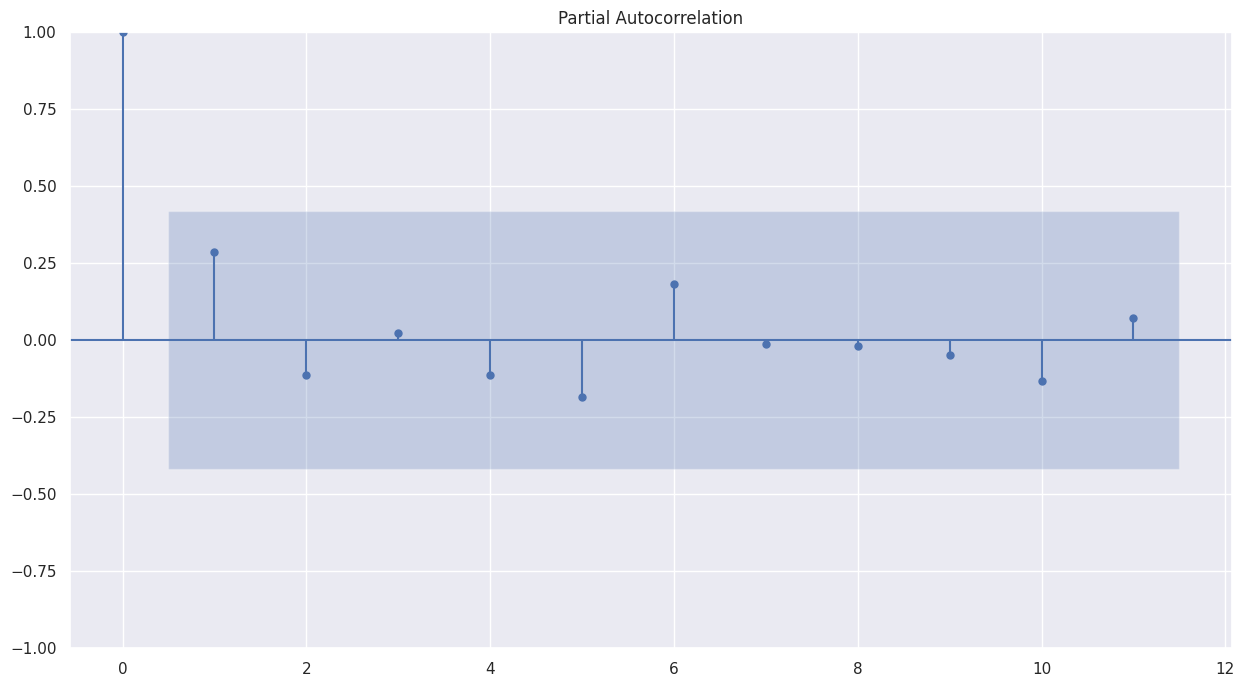

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
acf_plot=acf(new_df)
pacf_plot=pacf(new_df)
plot_acf(acf_plot);
plot_pacf(pacf_plot);

In [ ]:
new_df.shape

(137, 1)

In [ ]:
t_train=new_df[:123]['Weekly_Sales']
t_test=new_df[124:]['Weekly_Sales']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(train,order=(2,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  128
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1778.614
Date:                Wed, 15 May 2024   AIC                           3567.229
Time:                        13:13:32   BIC                           3581.489
Sample:                    02-05-2010   HQIC                          3573.023
                         - 07-13-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.114e+06   5.96e+04     35.448      0.000       2e+06    2.23e+06
ar.L1         -0.3974      0.238     -1.673      0.094      -0.863       0.068
ar.L2          0.4059      0.082      4.952      0.000       0.245       0.567
ma.L1          0.7559      0.262      2.882      0.004       0.242       1.270
sigma2      7.161e+10      0.276   2.59e+11      0.000    7.16e+10    7.16e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               344.25
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.80   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+33. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

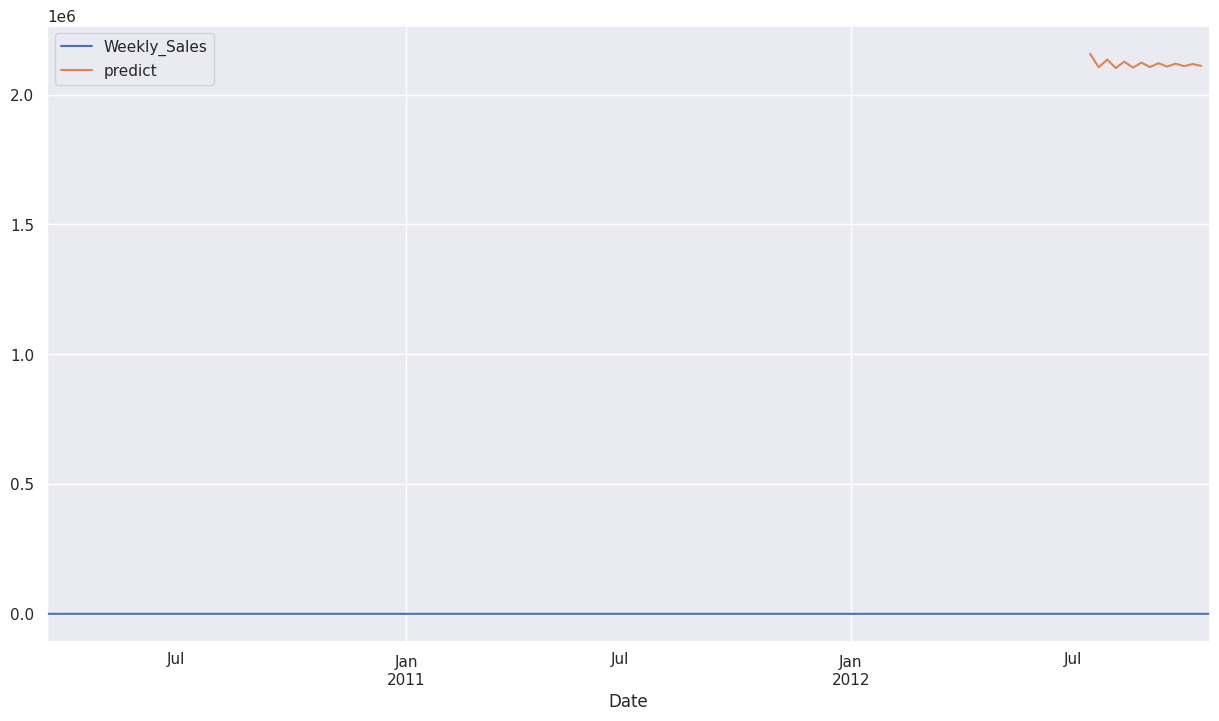

In [ ]:
new_df['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_df[['Weekly_Sales','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
model=SARIMAX(train,order=(2,0,1),seasonal_order=(2,0,1,7))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<Axes: xlabel='Date'>

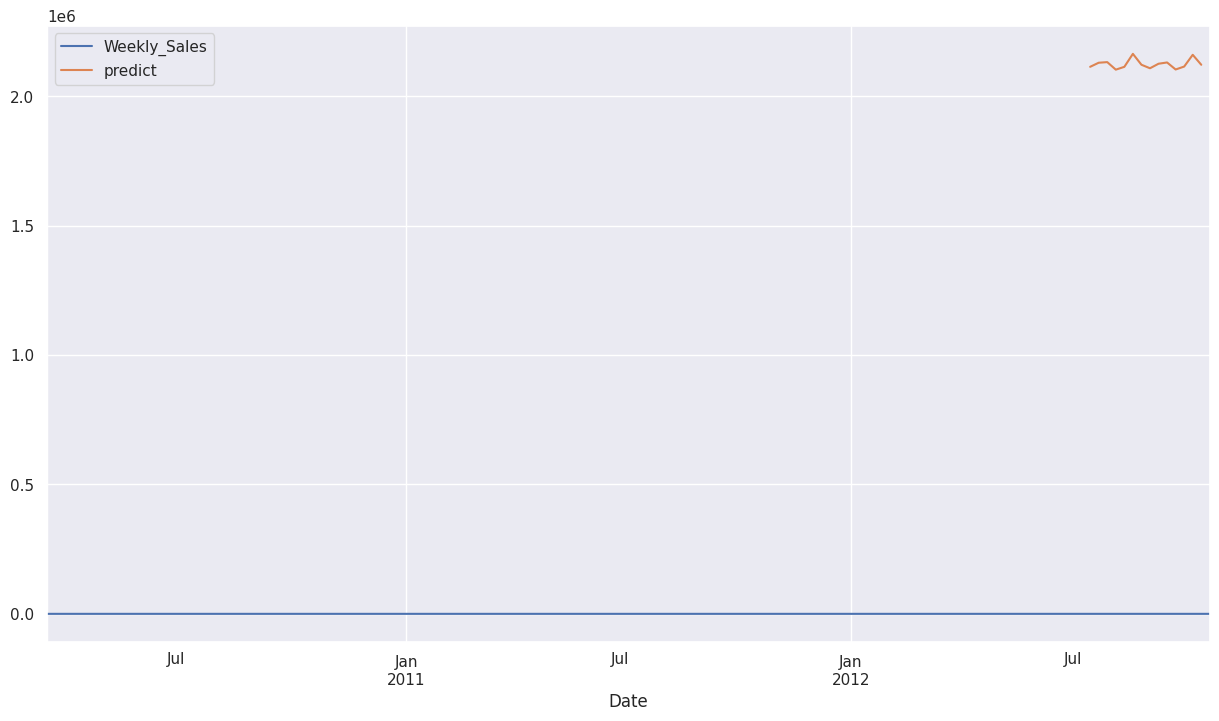

In [ ]:
new_df['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_df[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

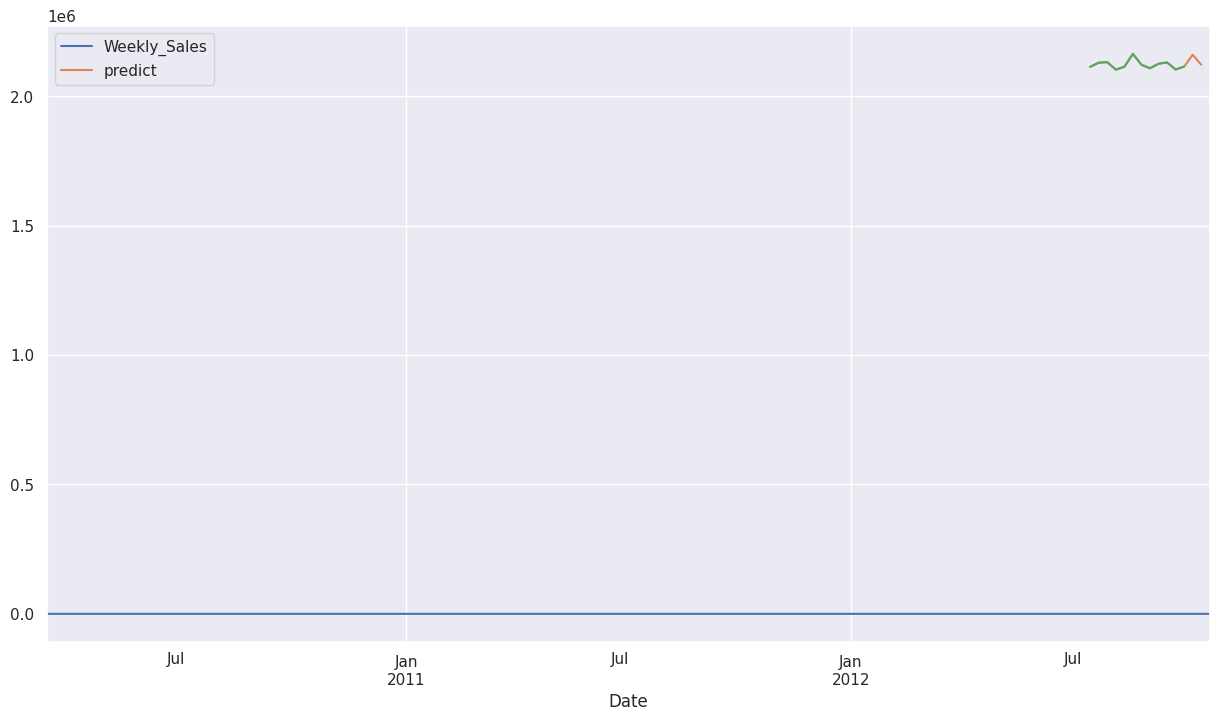

In [ ]:
forecast=model.forecast(steps=12)
new_df.plot()
forecast.plot()